# Predicting Total Daily Sales of Walmart

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from pylab import rcParams
import warnings

### Creating Objects

In [2]:
label_encoder = LabelEncoder()

In [3]:
rcParams['figure.figsize'] = 30, 15
warnings.filterwarnings('ignore')

### Loading Data

In [4]:
calendar_data = pd.read_csv("calendar.csv")
sales_train_validate = pd.read_csv("sales_train_validation.csv")
sell_price = pd.read_csv("sell_prices.csv")

### Calendar Data

In [5]:
calendar_data.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [6]:
calendar_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
date            1969 non-null object
wm_yr_wk        1969 non-null int64
weekday         1969 non-null object
wday            1969 non-null int64
month           1969 non-null int64
year            1969 non-null int64
d               1969 non-null object
event_name_1    162 non-null object
event_type_1    162 non-null object
event_name_2    5 non-null object
event_type_2    5 non-null object
snap_CA         1969 non-null int64
snap_TX         1969 non-null int64
snap_WI         1969 non-null int64
dtypes: int64(7), object(7)
memory usage: 737.5 KB


In [7]:
calendar_data["date"] = pd.to_datetime(calendar_data["date"])

In [8]:
nonservingcols = ["wday"]
calendar_data_updated = calendar_data.drop(nonservingcols, axis = 1)
calendar_data_updated = calendar_data_updated.fillna(0)

In [9]:
calendar_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
date            1969 non-null datetime64[ns]
wm_yr_wk        1969 non-null int64
weekday         1969 non-null object
wday            1969 non-null int64
month           1969 non-null int64
year            1969 non-null int64
d               1969 non-null object
event_name_1    162 non-null object
event_type_1    162 non-null object
event_name_2    5 non-null object
event_type_2    5 non-null object
snap_CA         1969 non-null int64
snap_TX         1969 non-null int64
snap_WI         1969 non-null int64
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 624.1 KB


In [10]:
calendar_data_updated

date  wm_yr_wk    weekday  month  year       d  event_name_1  \
0    2011-01-29     11101   Saturday      1  2011     d_1             0   
1    2011-01-30     11101     Sunday      1  2011     d_2             0   
2    2011-01-31     11101     Monday      1  2011     d_3             0   
3    2011-02-01     11101    Tuesday      2  2011     d_4             0   
4    2011-02-02     11101  Wednesday      2  2011     d_5             0   
...         ...       ...        ...    ...   ...     ...           ...   
1964 2016-06-15     11620  Wednesday      6  2016  d_1965             0   
1965 2016-06-16     11620   Thursday      6  2016  d_1966             0   
1966 2016-06-17     11620     Friday      6  2016  d_1967             0   
1967 2016-06-18     11621   Saturday      6  2016  d_1968             0   
1968 2016-06-19     11621     Sunday      6  2016  d_1969  NBAFinalsEnd   

     event_type_1  event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0               0             0            0        0        0        0  
1               0             0            0        0        0        0  
2               0             0            0        0        0        0  
3               0             0            0        1        1        0  
4               0             0            0        1        0        1  
...           ...           ...          ...      ...      ...      ...  
1964            0             0            0        0        1        1  
1965            0             0            0        0        0        0  
1966            0             0            0        0        0        0  
1967            0             0            0        0        0        0  
1968     Sporting  Father's day     Cultural        0        0        0  

[1969 rows x 13 columns]

In [11]:
encode_label_columns = ["event_type_1", "event_name_1", "event_type_2", "event_name_2"]
for each_label in encode_label_columns:
    calendar_data_updated[each_label] = label_encoder.fit_transform(calendar_data_updated[each_label].astype("str"))

In [12]:
calendar_data_updated

date  wm_yr_wk    weekday  month  year       d  event_name_1  \
0    2011-01-29     11101   Saturday      1  2011     d_1             0   
1    2011-01-30     11101     Sunday      1  2011     d_2             0   
2    2011-01-31     11101     Monday      1  2011     d_3             0   
3    2011-02-01     11101    Tuesday      2  2011     d_4             0   
4    2011-02-02     11101  Wednesday      2  2011     d_5             0   
...         ...       ...        ...    ...   ...     ...           ...   
1964 2016-06-15     11620  Wednesday      6  2016  d_1965             0   
1965 2016-06-16     11620   Thursday      6  2016  d_1966             0   
1966 2016-06-17     11620     Friday      6  2016  d_1967             0   
1967 2016-06-18     11621   Saturday      6  2016  d_1968             0   
1968 2016-06-19     11621     Sunday      6  2016  d_1969            17   

      event_type_1  event_name_2  event_type_2  snap_CA  snap_TX  snap_WI  
0                0             0             0        0        0        0  
1                0             0             0        0        0        0  
2                0             0             0        0        0        0  
3                0             0             0        1        1        0  
4                0             0             0        1        0        1  
...            ...           ...           ...      ...      ...      ...  
1964             0             0             0        0        1        1  
1965             0             0             0        0        0        0  
1966             0             0             0        0        0        0  
1967             0             0             0        0        0        0  
1968             4             3             1        0        0        0  

[1969 rows x 13 columns]

### Sales Data

In [13]:
sales_train_validate.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
0       CA    0    0    0    0  ...       1       3       0       1       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       2       1       2       1       1   
3       CA    0    0    0    0  ...       1       0       5       4       1   
4       CA    0    0    0    0  ...       2       1       1       0       1   

   d_1909  d_1910  d_1911  d_1912  d_1913  
0       1       3       0       1       1  
1       1       0       0       0       0  
2       1       0       1       1       1  
3       0       1       3       7       2  
4       1       2       2       2       4  

[5 rows x 1919 columns]

In [14]:
sales_train_validate.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 456.8 MB


### SELL DATA

In [15]:
sell_price.head()

store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26

In [16]:
sell_price.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
store_id      object
item_id       object
wm_yr_wk      int64
sell_price    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 957.5 MB


In [17]:
sell_price.memory_usage("deep") * 1e-6

Index          0.000128
store_id      54.728968
item_id       54.728968
wm_yr_wk      54.728968
sell_price    54.728968
dtype: float64

In [18]:
print("Max Value wm_yr_wk", sell_price["wm_yr_wk"].max())
print("Min Value wm_yr_wk", sell_price["wm_yr_wk"].min())

print("Max Value sell_price", sell_price["sell_price"].max())
print("Min Value sell_price", sell_price["sell_price"].min())

Max Value wm_yr_wk 11621
Min Value wm_yr_wk 11101
Max Value sell_price 107.32
Min Value sell_price 0.01


In [19]:
sell_price[["wm_yr_wk", "sell_price"]] = sell_price[["wm_yr_wk", "sell_price"]].astype(np.uint16)
sell_price[["store_id", "item_id"]] = sell_price[["store_id", "item_id"]].astype("category")

In [20]:
sell_price.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
store_id      category
item_id       category
wm_yr_wk      uint16
sell_price    uint16
dtypes: category(2), uint16(2)
memory usage: 46.0 MB


In [21]:
sell_price.memory_usage("deep") * 1e-6

Index          0.000128
store_id       6.841521
item_id       13.788554
wm_yr_wk      13.682242
sell_price    13.682242
dtype: float64

In [22]:
sell_price.size

27364484

#### Store Id frequency

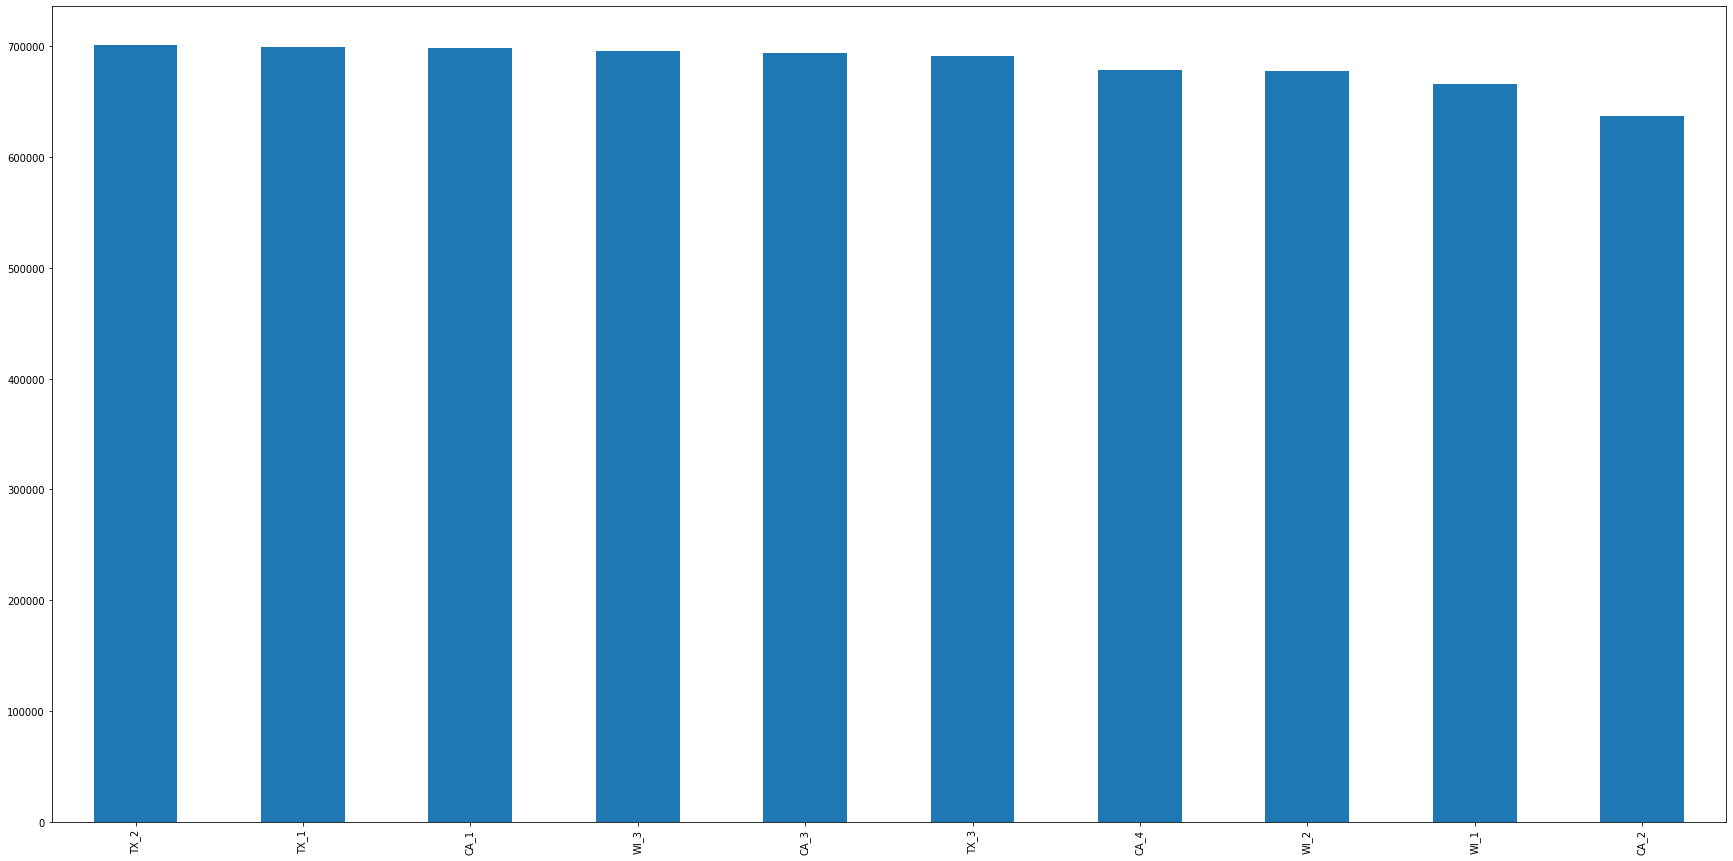

In [23]:
sell_price["store_id"].value_counts().plot(kind='bar')

In [24]:
print("Max : ", sell_price["sell_price"].max())
print("Min : ", sell_price["sell_price"].min())
print("Mean : ", sell_price["sell_price"].mean())

Max :  107
Min :  0
Mean :  3.708437842277603


In [25]:
sales_train_validate_melted = sales_train_validate.melt(id_vars=["id", "item_id", "dept_id", "cat_id", "store_id", "state_id"] ,value_vars=sales_train_validate.filter(regex=("d_\d+")), var_name='days', value_name='days sales')

In [26]:
sales_train_validate_melted.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id days  days sales  
0       CA  d_1           0  
1       CA  d_1           0  
2       CA  d_1           0  
3       CA  d_1           0  
4       CA  d_1           0

In [27]:
sales_train_validate_melted.size

466618960

In [28]:
sales_train_validate_melted = sales_train_validate_melted[sales_train_validate_melted["days sales"] != 0]

In [29]:
sales_train_validate_melted.size

148402208

In [30]:
ratio = sales_train_validate_melted.size/sales_train_validate_melted.size
print(ratio)

1.0


In [31]:
sales_calendar = sales_train_validate_melted.merge(calendar_data_updated, how='inner', left_on=["days"], right_on=["d"])

In [32]:
sales_calendar.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_008_CA_1_validation  HOBBIES_1_008  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_009_CA_1_validation  HOBBIES_1_009  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_015_CA_1_validation  HOBBIES_1_015  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_016_CA_1_validation  HOBBIES_1_016  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_022_CA_1_validation  HOBBIES_1_022  HOBBIES_1  HOBBIES     CA_1   

  state_id days  days sales       date  wm_yr_wk  ... month  year    d  \
0       CA  d_1          12 2011-01-29     11101  ...     1  2011  d_1   
1       CA  d_1           2 2011-01-29     11101  ...     1  2011  d_1   
2       CA  d_1           4 2011-01-29     11101  ...     1  2011  d_1   
3       CA  d_1           5 2011-01-29     11101  ...     1  2011  d_1   
4       CA  d_1           2 2011-01-29     11101  ...     1  2011  d_1   

  event_name_1  event_type_1  event_name_2  event_type_2  snap_CA  snap_TX  \
0            0             0             0             0        0        0   
1            0             0             0             0        0        0   
2            0             0             0             0        0        0   
3            0             0             0             0        0        0   
4            0             0             0             0        0        0   

   snap_WI  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 21 columns]

In [43]:
sales_per_week  = sales_calendar[["item_id", "store_id", "state_id", "days", "days sales", "wm_yr_wk", "weekday"]].merge(sell_price, how='inner', left_on=["item_id", "store_id", "wm_yr_wk"], right_on=["item_id", "store_id", "wm_yr_wk"])

In [44]:
sales_per_week

item_id store_id state_id    days  days sales  wm_yr_wk  \
0         HOBBIES_1_008     CA_1       CA     d_1          12     11101   
1         HOBBIES_1_008     CA_1       CA     d_2          15     11101   
2         HOBBIES_1_008     CA_1       CA     d_6           4     11101   
3         HOBBIES_1_008     CA_1       CA     d_7           6     11101   
4         HOBBIES_1_009     CA_1       CA     d_1           2     11101   
...                 ...      ...      ...     ...         ...       ...   
18550271    FOODS_3_806     WI_3       WI  d_1913           1     11613   
18550272    FOODS_3_817     WI_3       WI  d_1913           1     11613   
18550273    FOODS_3_819     WI_3       WI  d_1913           2     11613   
18550274    FOODS_3_820     WI_3       WI  d_1913           1     11613   
18550275    FOODS_3_823     WI_3       WI  d_1913           1     11613   

           weekday  sell_price  
0         Saturday           0  
1           Sunday           0  
2         Thursday           0  
3           Friday           0  
4         Saturday           1  
...            ...         ...  
18550271    Sunday           2  
18550272    Sunday           2  
18550273    Sunday           1  
18550274    Sunday           1  
18550275    Sunday           2  

[18550276 rows x 8 columns]

In [45]:
sales_per_week["total_sales"] = sales_per_week["sell_price"] * sales_per_week["days sales"]

In [46]:
sales_per_week["days"] = sales_per_week["days"].apply(lambda x: x.strip("d_"))

In [47]:
sales_per_week["days"].max()

'999'

In [48]:
sales_per_week["days"] = sales_per_week["days"].astype(np.uint16)

In [49]:
sales_per_week

item_id store_id state_id  days  days sales  wm_yr_wk  \
0         HOBBIES_1_008     CA_1       CA     1          12     11101   
1         HOBBIES_1_008     CA_1       CA     2          15     11101   
2         HOBBIES_1_008     CA_1       CA     6           4     11101   
3         HOBBIES_1_008     CA_1       CA     7           6     11101   
4         HOBBIES_1_009     CA_1       CA     1           2     11101   
...                 ...      ...      ...   ...         ...       ...   
18550271    FOODS_3_806     WI_3       WI  1913           1     11613   
18550272    FOODS_3_817     WI_3       WI  1913           1     11613   
18550273    FOODS_3_819     WI_3       WI  1913           2     11613   
18550274    FOODS_3_820     WI_3       WI  1913           1     11613   
18550275    FOODS_3_823     WI_3       WI  1913           1     11613   

           weekday  sell_price  total_sales  
0         Saturday           0            0  
1           Sunday           0            0  
2         Thursday           0            0  
3           Friday           0            0  
4         Saturday           1            2  
...            ...         ...          ...  
18550271    Sunday           2            2  
18550272    Sunday           2            2  
18550273    Sunday           1            2  
18550274    Sunday           1            1  
18550275    Sunday           2            2  

[18550276 rows x 9 columns]

In [50]:
days_total_sales = sales_per_week[["days", "total_sales"]].groupby("days", as_index=False).sum().sort_values(by="days")

In [59]:
days_total_sales

days  total_sales
0        1        64164
1        2        62013
2        3        44998
3        4        47694
4        5        36690
...    ...          ...
1908  1909        89058
1909  1910        86972
1910  1911        99953
1911  1912       122544
1912  1913       129367

[1913 rows x 2 columns]

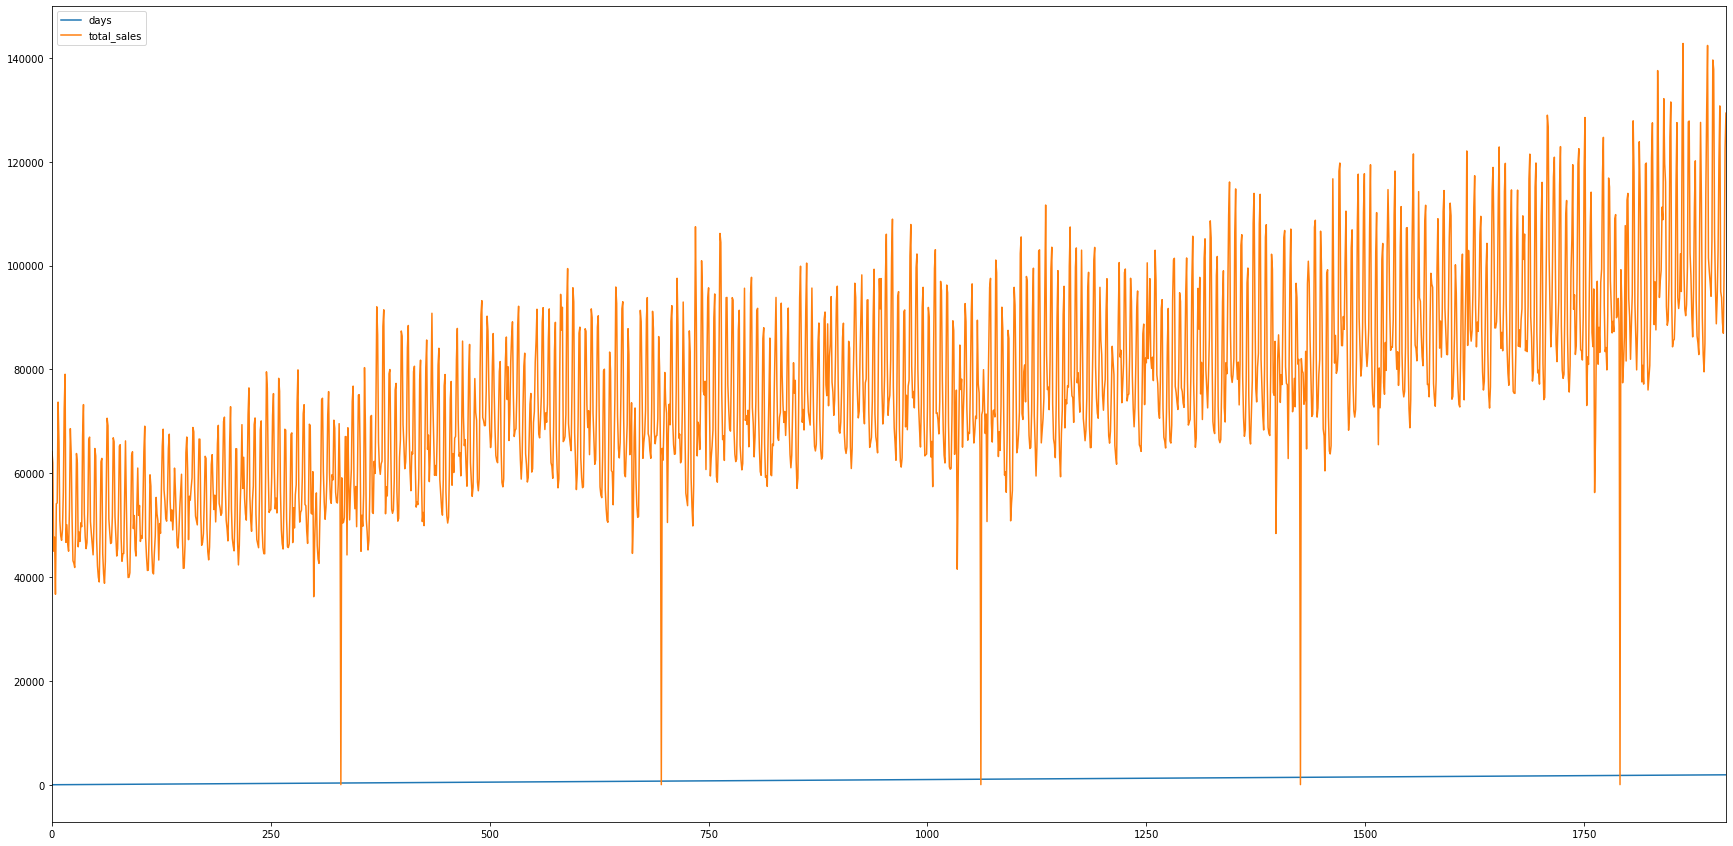

In [51]:
days_total_sales.plot()

Observations:
1. Trend is increasing.
2. There is a seasonality behaviour.
3. In seasonality there is a sharp dip, may be becaus of some festival season.

#### Plot Distribution 

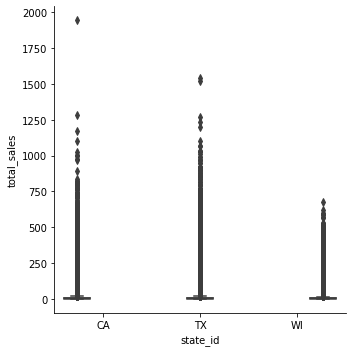

In [76]:
sns.catplot(x="state_id", y="total_sales", hue="state_id", kind="box", data = sales_per_week[["state_id", "total_sales"]])

In [64]:
state_wise_sales = sales_per_week[["state_id", "total_sales"]].groupby("state_id", as_index=False).sum()

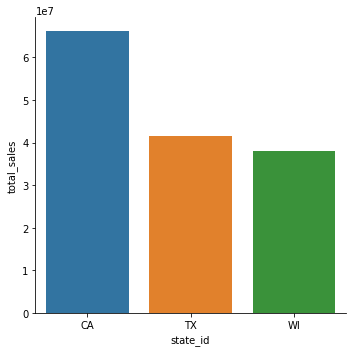

In [67]:
sns.catplot(x = "state_id", y="total_sales", data=state_wise_sales, kind='bar')

In [85]:
days_wise_sales = sales_per_week[["weekday", "total_sales"]].groupby("weekday", as_index=False).sum()

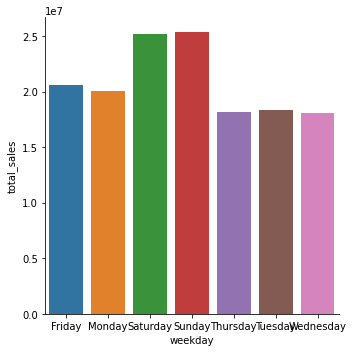

In [87]:
sns.catplot(x="weekday", y="total_sales", kind="bar", data=days_wise_sales)

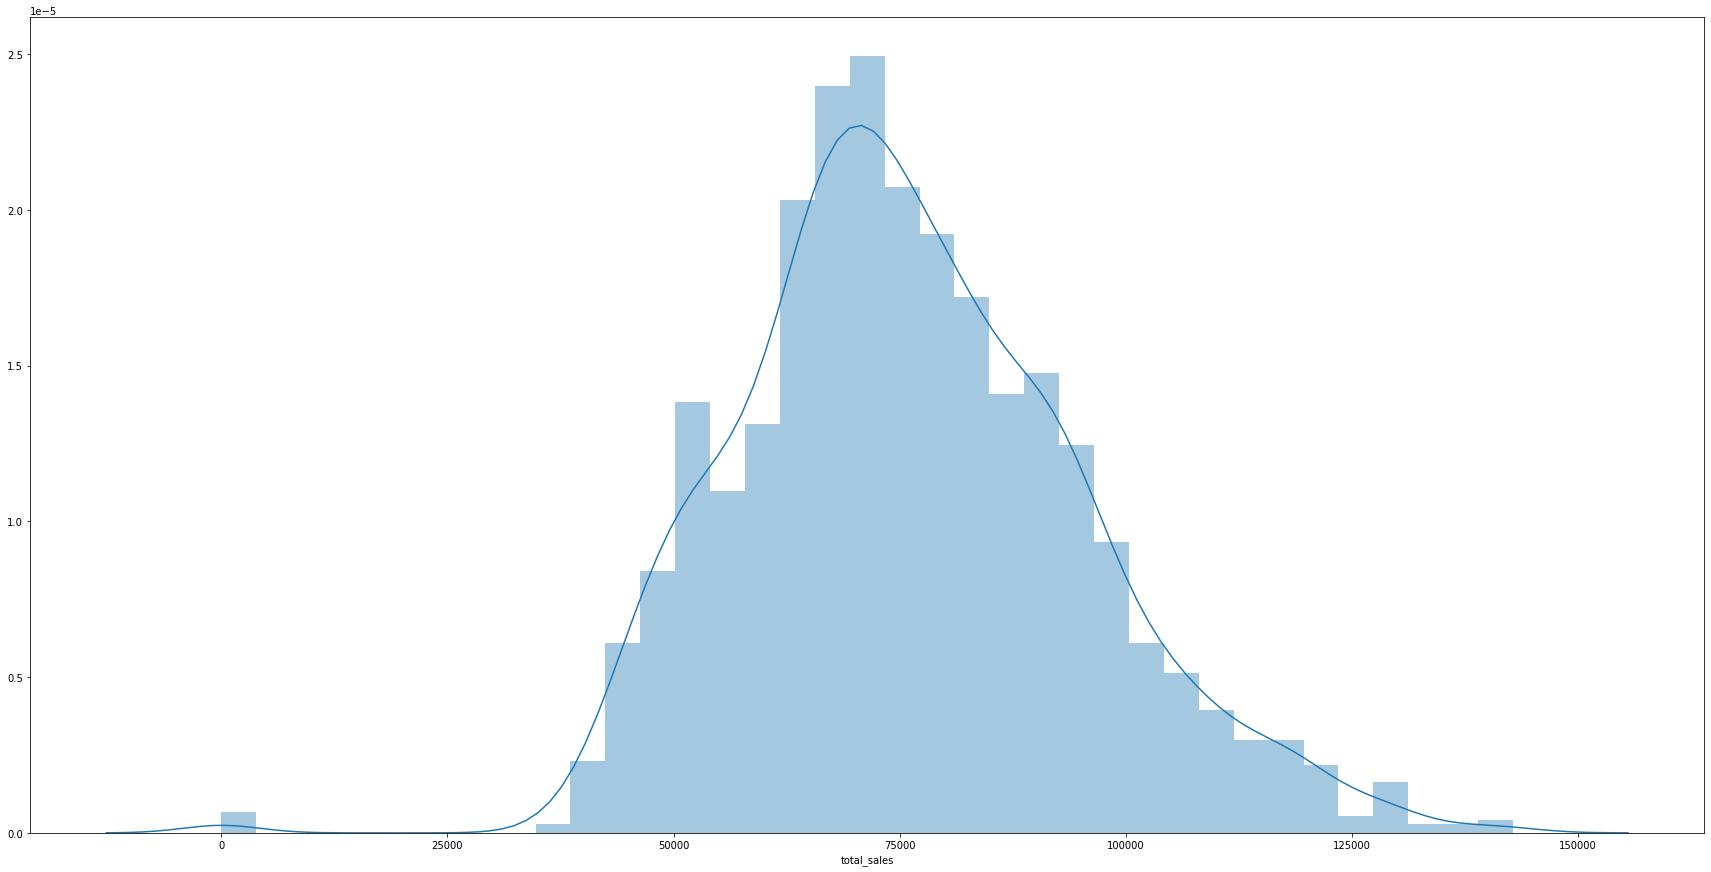

In [41]:
sns.distplot(days_total_sales["total_sales"])

In [42]:
mean_of_sale = days_total_sales["total_sales"].mean()
var_of_sale = days_total_sales["total_sales"].var()
std_of_sales = days_total_sales["total_sales"].std()

print("Mean of Sales: ", mean_of_sale)
print("Variance of Sales: ", var_of_sale)
print("Standard Deviation of Sales: ", std_of_sales)

Mean of Sales:  76174.69994772608
Variance of Sales:  356205268.1390011
Standard Deviation of Sales:  18873.401075031525


In [43]:
total_len = len(days_total_sales["total_sales"])
length_between_three_sd = len(days_total_sales["total_sales"][days_total_sales["total_sales"].between(mean_of_sale - (3 *std_of_sales),mean_of_sale + (3 *std_of_sales))])
length_between_two_sd = len(days_total_sales["total_sales"][days_total_sales["total_sales"].between(mean_of_sale - (2 *std_of_sales),mean_of_sale + (2 *std_of_sales))])
length_between_one_sd = len(days_total_sales["total_sales"][days_total_sales["total_sales"].between(mean_of_sale - (1 *std_of_sales),mean_of_sale + (1 *std_of_sales))])
percentage_between_three_sd = round((length_between_three_sd/ total_len) * 100, 2)
percentage_between_two_sd = round((length_between_two_sd/ total_len) * 100, 2)
percentage_between_one_sd = round((length_between_one_sd/ total_len) * 100, 2)

print(f"Between one sd {percentage_between_one_sd}%")
print(f"Between two sd {percentage_between_two_sd}%")
print(f"Between three sd {percentage_between_three_sd}%")

Between one sd 69.37%
Between two sd 95.77%
Between three sd 99.48%


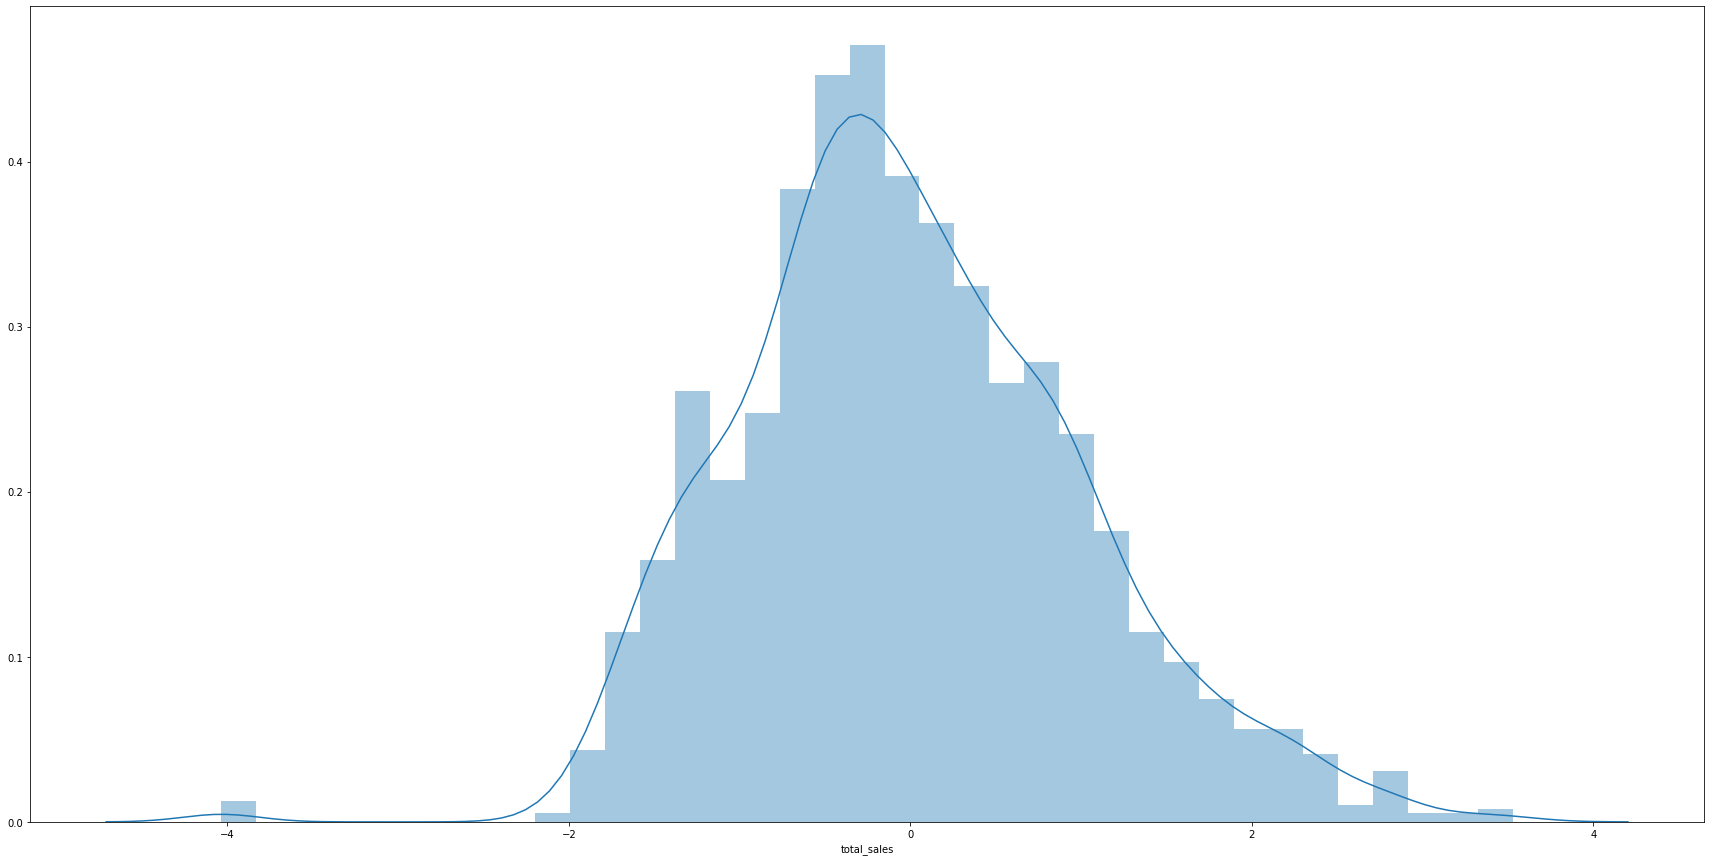

In [44]:
sns.distplot((days_total_sales["total_sales"] - mean_of_sale)/ std_of_sales)

#### Days with Less Sales

In [45]:
mean_of_sale + 2* std_of_sales

113921.50209778914

In [46]:
days_total_sales["total_sales"].min()

17

In [47]:
less_sales = days_total_sales[days_total_sales["total_sales"] < 100]

In [48]:
less_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 330 to 1791
Data columns (total 2 columns):
days           5 non-null uint64
total_sales    5 non-null int64
dtypes: int64(1), uint64(1)
memory usage: 120.0 bytes


In [49]:
less_sales_days = less_sales["days"].apply(lambda day: f"d_{day}")

In [50]:
calendar_data[calendar_data["d"].isin(less_sales_days)]

date  wm_yr_wk    weekday  wday  month  year       d event_name_1  \
330  2011-12-25     11148     Sunday     2     12  2011   d_331    Christmas   
696  2012-12-25     11248    Tuesday     4     12  2012   d_697    Christmas   
1061 2013-12-25     11348  Wednesday     5     12  2013  d_1062    Christmas   
1426 2014-12-25     11447   Thursday     6     12  2014  d_1427    Christmas   
1791 2015-12-25     11547     Friday     7     12  2015  d_1792    Christmas   

     event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
330      National          NaN          NaN        0        0        0  
696      National          NaN          NaN        0        0        0  
1061     National          NaN          NaN        0        0        0  
1426     National          NaN          NaN        0        0        0  
1791     National          NaN          NaN        0        0        0

so its confirm that on 25th dec i.e Christmas sales is less

#### Days with highest number of Sales

In [51]:
days_total_sales.sort_values("days", ascending=True)

days  total_sales
0        1        64164
1        2        62013
2        3        44998
3        4        47694
4        5        36690
...    ...          ...
1908  1909        89058
1909  1910        86972
1910  1911        99953
1911  1912       122544
1912  1913       129367

[1913 rows x 2 columns]

In [52]:
mean_add_two_sd = mean_of_sale + (2 *std_of_sales)

In [53]:
mean_add_two_sd

113921.50209778914

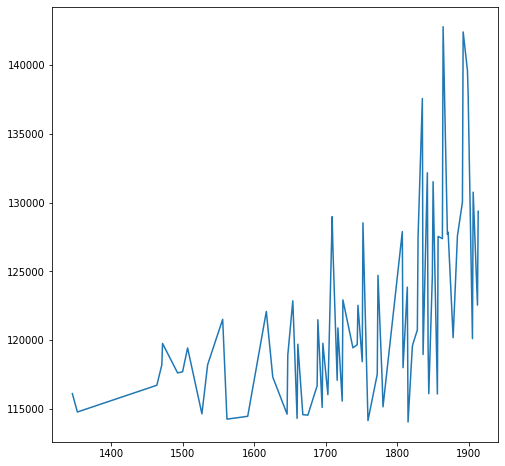

In [54]:
days_mean_add_two_sd = days_total_sales[days_total_sales["total_sales"] > mean_add_two_sd]
plt.figure(figsize=(8,8))
plt.plot(days_mean_add_two_sd["days"], days_mean_add_two_sd["total_sales"])
#days_mean_add_two_sd.sort_values(by="days").plot()

In [55]:
days_with_high_sale = days_mean_add_two_sd["days"].apply(lambda day: f"d_{day}")
calendar_data[calendar_data["d"].isin(days_with_high_sale)].head(50)

date  wm_yr_wk   weekday  wday  month  year       d  \
1345 2014-10-05     11436    Sunday     2     10  2014  d_1346   
1352 2014-10-12     11437    Sunday     2     10  2014  d_1353   
1463 2015-01-31     11501  Saturday     1      1  2015  d_1464   
1470 2015-02-07     11502  Saturday     1      2  2015  d_1471   
1471 2015-02-08     11502    Sunday     2      2  2015  d_1472   
1492 2015-03-01     11505    Sunday     2      3  2015  d_1493   
1499 2015-03-08     11506    Sunday     2      3  2015  d_1500   
1506 2015-03-15     11507    Sunday     2      3  2015  d_1507   
1526 2015-04-04     11510  Saturday     1      4  2015  d_1527   
1534 2015-04-12     11511    Sunday     2      4  2015  d_1535   
1555 2015-05-03     11514    Sunday     2      5  2015  d_1556   
1561 2015-05-09     11515  Saturday     1      5  2015  d_1562   
1590 2015-06-07     11519    Sunday     2      6  2015  d_1591   
1616 2015-07-03     11522    Friday     7      7  2015  d_1617   
1625 2015-07-12     11524    Sunday     2      7  2015  d_1626   
1645 2015-08-01     11527  Saturday     1      8  2015  d_1646   
1646 2015-08-02     11527    Sunday     2      8  2015  d_1647   
1653 2015-08-09     11528    Sunday     2      8  2015  d_1654   
1659 2015-08-15     11529  Saturday     1      8  2015  d_1660   
1660 2015-08-16     11529    Sunday     2      8  2015  d_1661   
1667 2015-08-23     11530    Sunday     2      8  2015  d_1668   
1674 2015-08-30     11531    Sunday     2      8  2015  d_1675   
1687 2015-09-12     11533  Saturday     1      9  2015  d_1688   
1688 2015-09-13     11533    Sunday     2      9  2015  d_1689   
1694 2015-09-19     11534  Saturday     1      9  2015  d_1695   
1695 2015-09-20     11534    Sunday     2      9  2015  d_1696   
1702 2015-09-27     11535    Sunday     2      9  2015  d_1703   
1708 2015-10-03     11536  Saturday     1     10  2015  d_1709   
1709 2015-10-04     11536    Sunday     2     10  2015  d_1710   
1715 2015-10-10     11537  Saturday     1     10  2015  d_1716   
1716 2015-10-11     11537    Sunday     2     10  2015  d_1717   
1722 2015-10-17     11538  Saturday     1     10  2015  d_1723   
1723 2015-10-18     11538    Sunday     2     10  2015  d_1724   
1737 2015-11-01     11540    Sunday     2     11  2015  d_1738   
1743 2015-11-07     11541  Saturday     1     11  2015  d_1744   
1744 2015-11-08     11541    Sunday     2     11  2015  d_1745   
1750 2015-11-14     11542  Saturday     1     11  2015  d_1751   
1751 2015-11-15     11542    Sunday     2     11  2015  d_1752   
1758 2015-11-22     11543    Sunday     2     11  2015  d_1759   
1771 2015-12-05     11545  Saturday     1     12  2015  d_1772   
1772 2015-12-06     11545    Sunday     2     12  2015  d_1773   
1778 2015-12-12     11546  Saturday     1     12  2015  d_1779   
1779 2015-12-13     11546    Sunday     2     12  2015  d_1780   
1806 2016-01-09     11550  Saturday     1      1  2016  d_1807   
1807 2016-01-10     11550    Sunday     2      1  2016  d_1808   
1813 2016-01-16     11551  Saturday     1      1  2016  d_1814   
1814 2016-01-17     11551    Sunday     2      1  2016  d_1815   
1820 2016-01-23     11552  Saturday     1      1  2016  d_1821   
1821 2016-01-24     11552    Sunday     2      1  2016  d_1822   
1827 2016-01-30     11601  Saturday     1      1  2016  d_1828   

        event_name_1 event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  \
1345             NaN          NaN          NaN          NaN        1        1   
1352             NaN          NaN          NaN          NaN        0        1   
1463             NaN          NaN          NaN          NaN        0        0   
1470             NaN          NaN          NaN          NaN        1        1   
1471             NaN          NaN          NaN          NaN        1        0   
1492             NaN          NaN          NaN          NaN        1        1   
1499             NaN          NaN          NaN          NaN        1        0

most of the sales are on weekend

##### Smoothing

As seasonality and trends are present in data. We can use two models:
1. Holt-Winter Exponential Smoothing.
2. SARIMA Model


### Holt-Winter Exponential Smoothing

In [56]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [57]:
days_total_sales["converted_days"] = days_total_sales["days"].apply(lambda each_day: f"d_{each_day}")
days_total_sales["date"] = days_total_sales.merge(calendar_data_updated, how='inner',left_on=['converted_days'], right_on=['d'])["date"]

In [58]:
days_total_sales

days  total_sales converted_days       date
0        1        64164            d_1 2011-01-29
1        2        62013            d_2 2011-01-30
2        3        44998            d_3 2011-01-31
3        4        47694            d_4 2011-02-01
4        5        36690            d_5 2011-02-02
...    ...          ...            ...        ...
1908  1909        89058         d_1909 2016-04-20
1909  1910        86972         d_1910 2016-04-21
1910  1911        99953         d_1911 2016-04-22
1911  1912       122544         d_1912 2016-04-23
1912  1913       129367         d_1913 2016-04-24

[1913 rows x 4 columns]

In [59]:
datewise_total_sales = days_total_sales[["date", "total_sales"]]
datewise_total_sales.set_index("date", inplace=True)

In [60]:
datewise_total_sales

total_sales
date                   
2011-01-29        64164
2011-01-30        62013
2011-01-31        44998
2011-02-01        47694
2011-02-02        36690
...                 ...
2016-04-20        89058
2016-04-21        86972
2016-04-22        99953
2016-04-23       122544
2016-04-24       129367

[1913 rows x 1 columns]

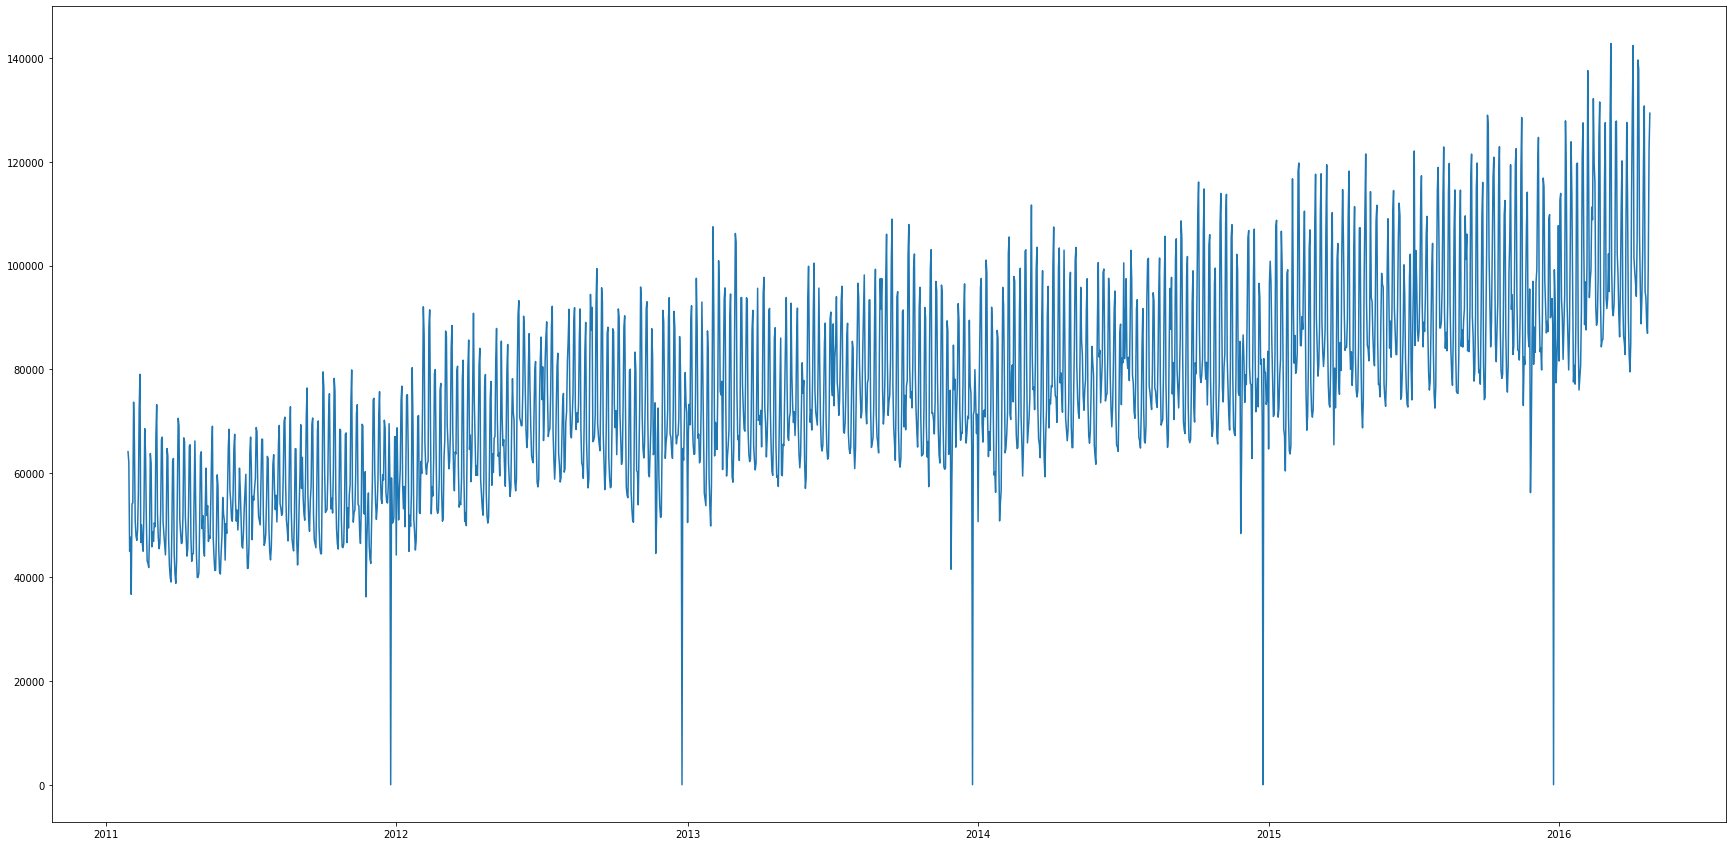

In [61]:
plt.plot(datewise_total_sales)

In [62]:
train_datewise_total_sales, test_datewise_total_sales = datewise_total_sales[:"2014-12-31"], datewise_total_sales["2015-01-01":]

In [63]:
train_datewise_total_sales

total_sales
date                   
2011-01-29        64164
2011-01-30        62013
2011-01-31        44998
2011-02-01        47694
2011-02-02        36690
...                 ...
2014-12-27        79718
2014-12-28        79337
2014-12-29        73284
2014-12-30        74238
2014-12-31        83487

[1433 rows x 1 columns]

In [64]:
test_datewise_total_sales

total_sales
date                   
2015-01-01        64686
2015-01-02        96484
2015-01-03       100846
2015-01-04        96789
2015-01-05        85761
...                 ...
2016-04-20        89058
2016-04-21        86972
2016-04-22        99953
2016-04-23       122544
2016-04-24       129367

[480 rows x 1 columns]

In [65]:
# Holts Winter Smoothing
exp_mul_smoothing = ExponentialSmoothing(np.array(train_datewise_total_sales["total_sales"]), trend='add', seasonal='add', seasonal_periods=365, damped=True).fit(smoothing_level=0.01)
train_datewise_total_sales["holt_winter"] = exp_mul_smoothing.fittedvalues
test_datewise_total_sales["holt_winter"] = exp_mul_smoothing.forecast(len(test_datewise_total_sales))

In [66]:
test_datewise_total_sales.head(10)

total_sales    holt_winter
date                                  
2015-01-01        64686   93042.298290
2015-01-02        96484   83061.386333
2015-01-03       100846   76228.019238
2015-01-04        96789   82153.501007
2015-01-05        85761   86064.019143
2015-01-06        78491   98623.322924
2015-01-07        70942  101251.559268
2015-01-08        71350   82678.902987
2015-01-09        83246   78125.898341
2015-01-10       107396   82305.865266

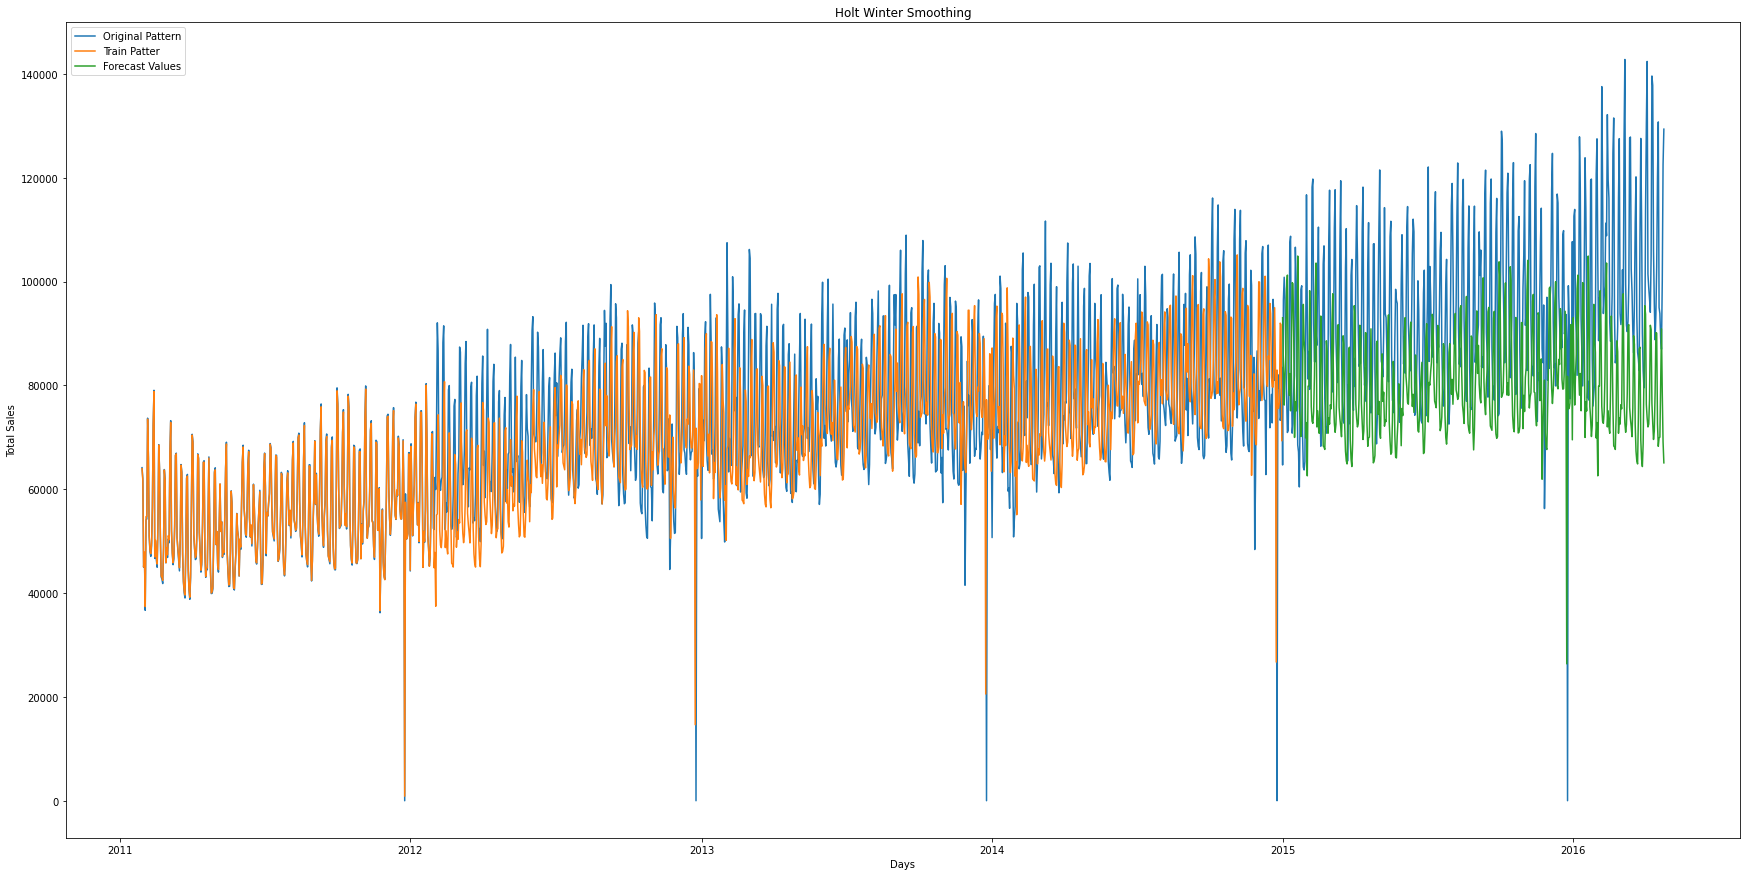

In [67]:
plt.plot(datewise_total_sales["total_sales"], label="Original Pattern")
plt.plot(train_datewise_total_sales["holt_winter"], label="Train Patter")
plt.plot(test_datewise_total_sales["holt_winter"], label="Forecast Values")
plt.title("Holt Winter Smoothing")
plt.xlabel("Days")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

In [68]:
training_error = np.sqrt(mean_squared_error(train_datewise_total_sales["holt_winter"], train_datewise_total_sales["total_sales"]))
test_error = np.sqrt(mean_squared_error(test_datewise_total_sales["holt_winter"], test_datewise_total_sales["total_sales"]))

print(f"Traing RMSE(Root Mean Sqaure Error) : {training_error}")
print(f"Traing RMSE(Root Mean Sqaure Error) : {test_error}")

Traing RMSE(Root Mean Sqaure Error) : 14359.615875990656
Traing RMSE(Root Mean Sqaure Error) : 26128.078815017696


## SARIMA Model

####  - Check data is stationary or not ( ADF Test)

In [69]:
from statsmodels.tsa.stattools import adfuller

In [70]:
def adf_result(sales, alpha):
    result = adfuller(sales)
    output_labels = ["ADF test stats", "p-value", "# lags used", "# observation used"]
    for label, value in zip(output_labels, result):
        print(f"{label} : {value}")
    if result[1] <= alpha:
        print("Data is Stationary")
    else:
        print("Data is non-stationary")

In [71]:
result = adf_result(datewise_total_sales["total_sales"], alpha=0.05)


ADF test stats : -0.5960185267291632
p-value : 0.8718791411072504
# lags used : 26
# observation used : 1886
Data is non-stationary


### As time series is not stationarty we will make it stationary with the help of differencing

In [72]:
datewise_total_sales["first_difference"] = datewise_total_sales["total_sales"].diff(1)

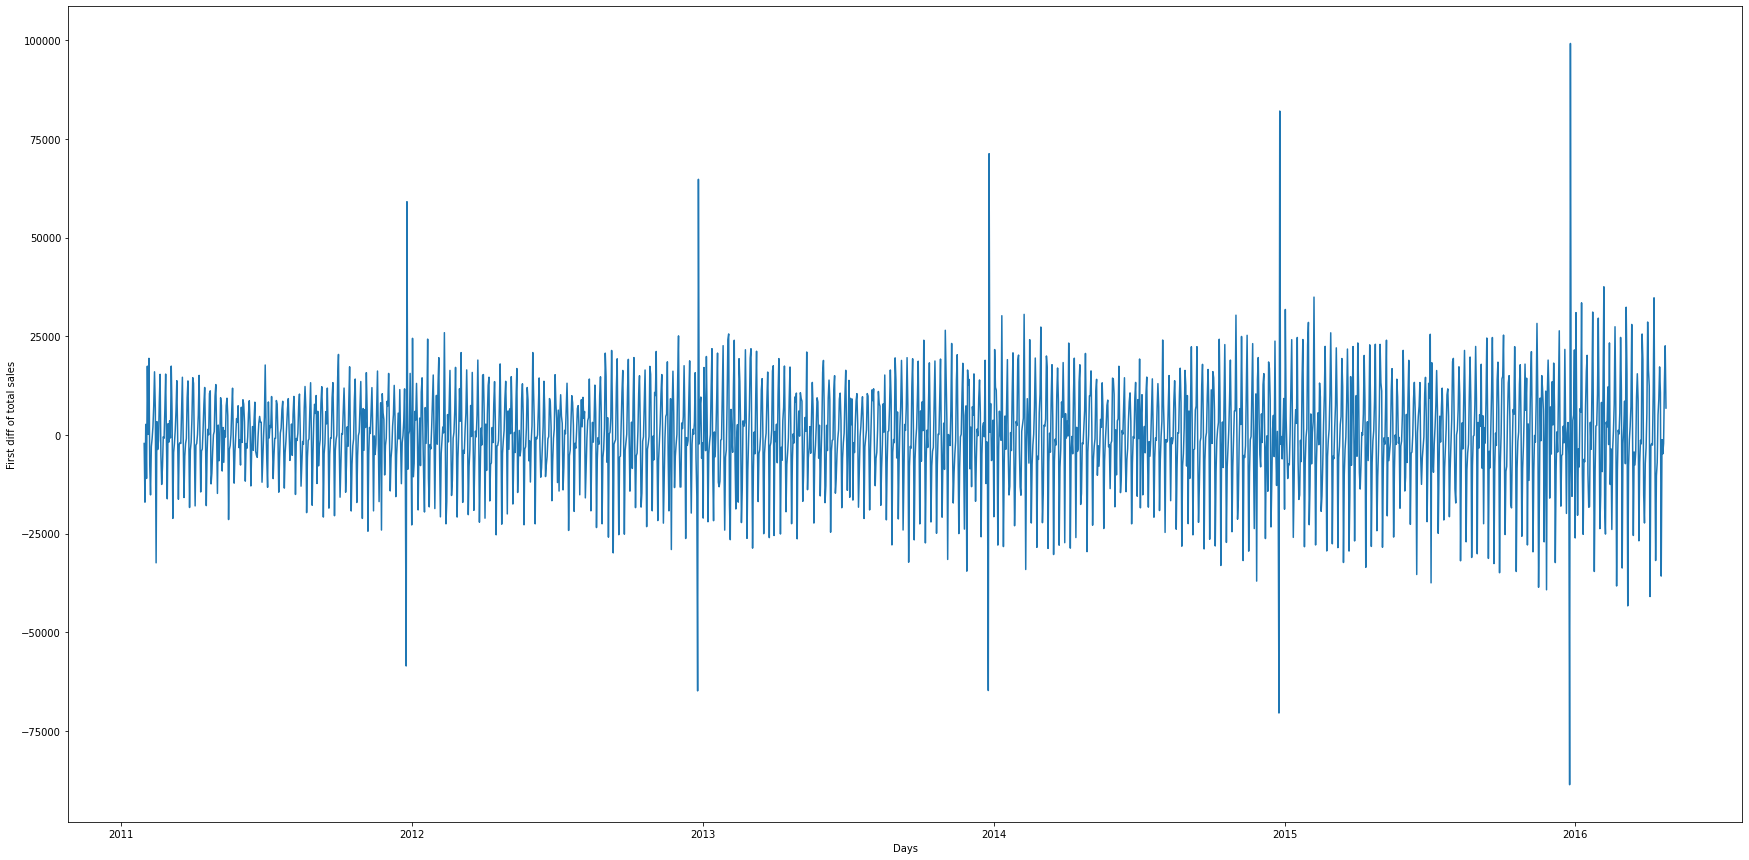

In [73]:
plt.plot(datewise_total_sales["first_difference"])
plt.xlabel("Days")
plt.ylabel("First diff of total sales")
plt.show()

In [74]:
result = adf_result(datewise_total_sales["first_difference"][1:], alpha=0.025)

ADF test stats : -24.221573181040224
p-value : 0.0
# lags used : 26
# observation used : 1885
Data is Stationary


##### Remove Seasonality (Weekly Difference)

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [76]:
datewise_total_sales["weekly_diff_without_seasonality"] = datewise_total_sales["total_sales"].diff(7)

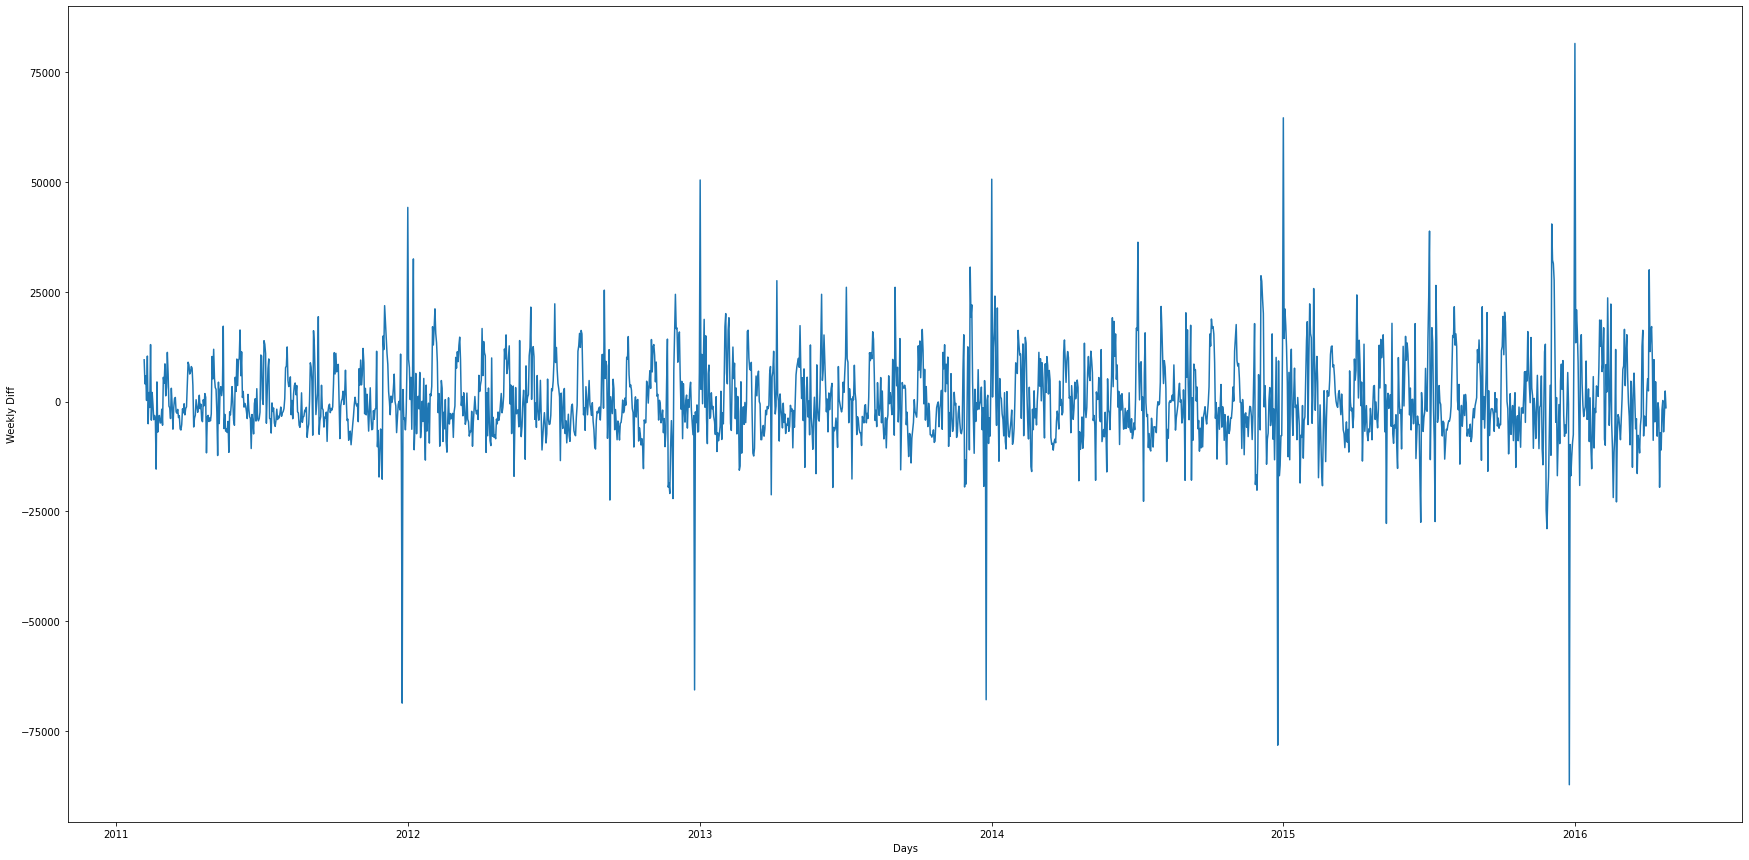

In [77]:
plt.plot(datewise_total_sales["weekly_diff_without_seasonality"])
plt.xlabel("Days")
plt.ylabel("Weekly Diff")
plt.show()

In [78]:
weekly_seasonal_decompose_result = seasonal_decompose(datewise_total_sales["weekly_diff_without_seasonality"].dropna(), model='add')

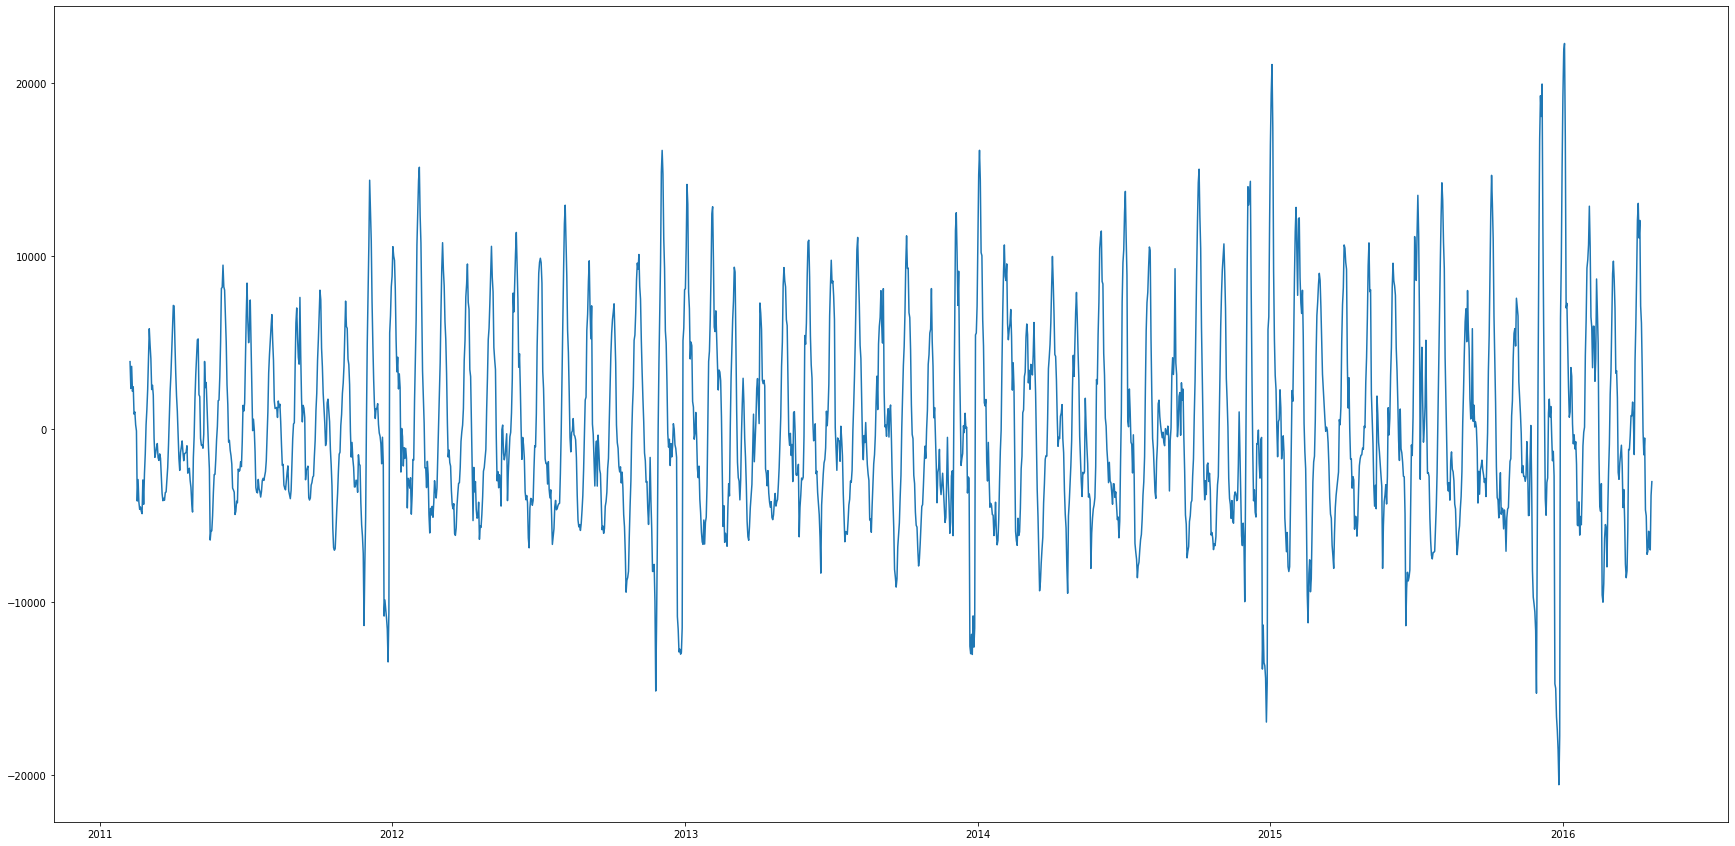

In [79]:
plt.plot(weekly_seasonal_decompose_result.trend)

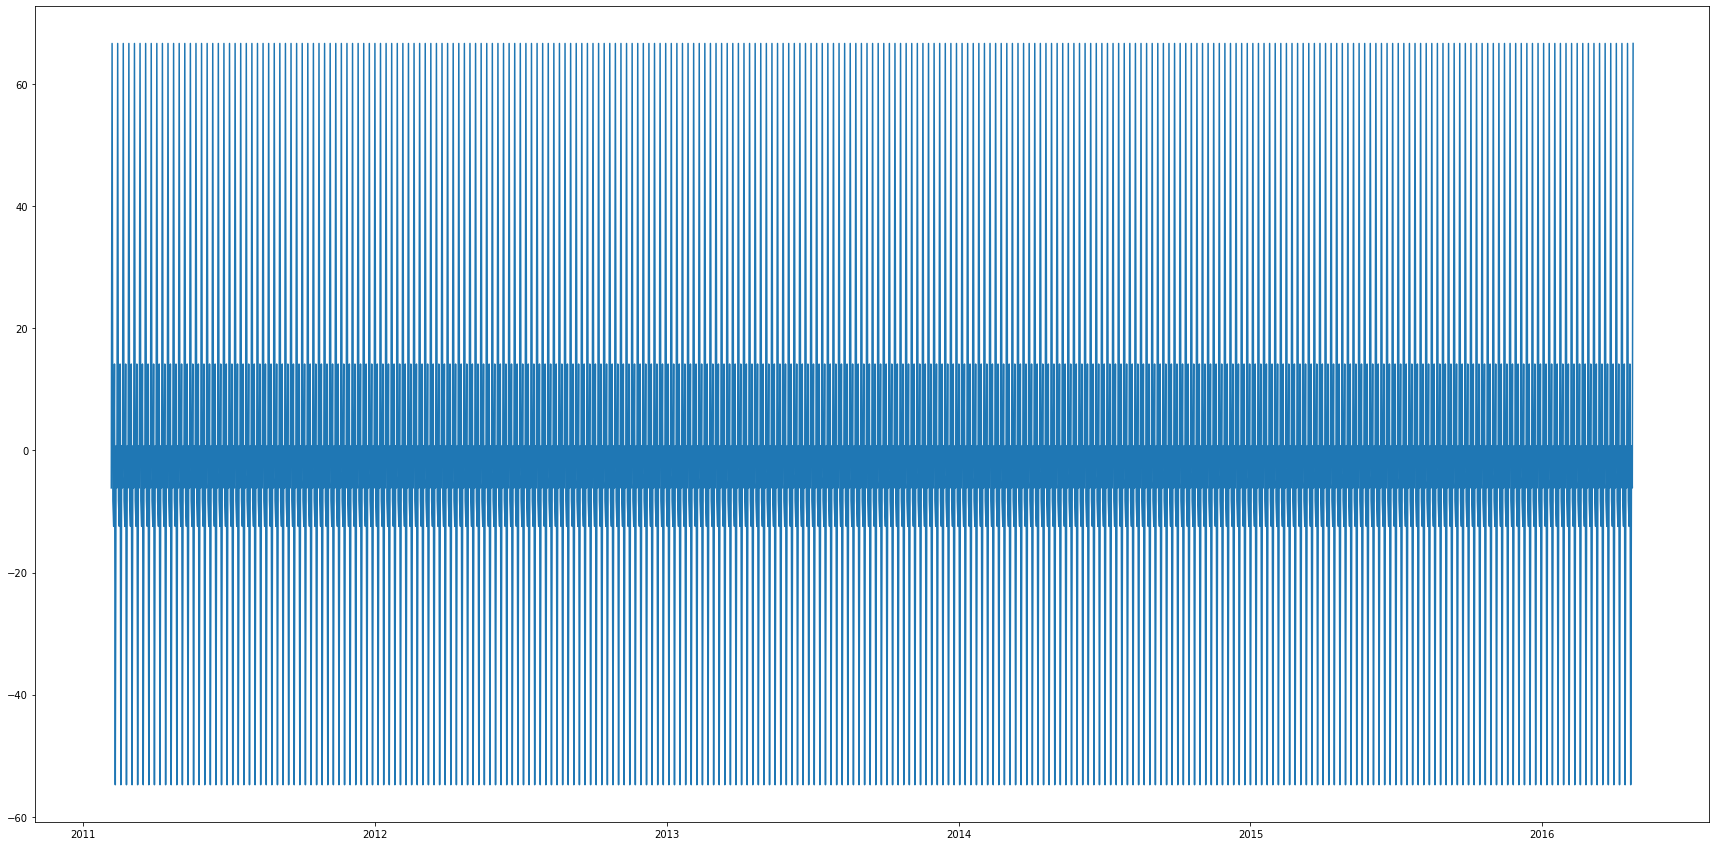

In [80]:
plt.plot(weekly_seasonal_decompose_result.seasonal)

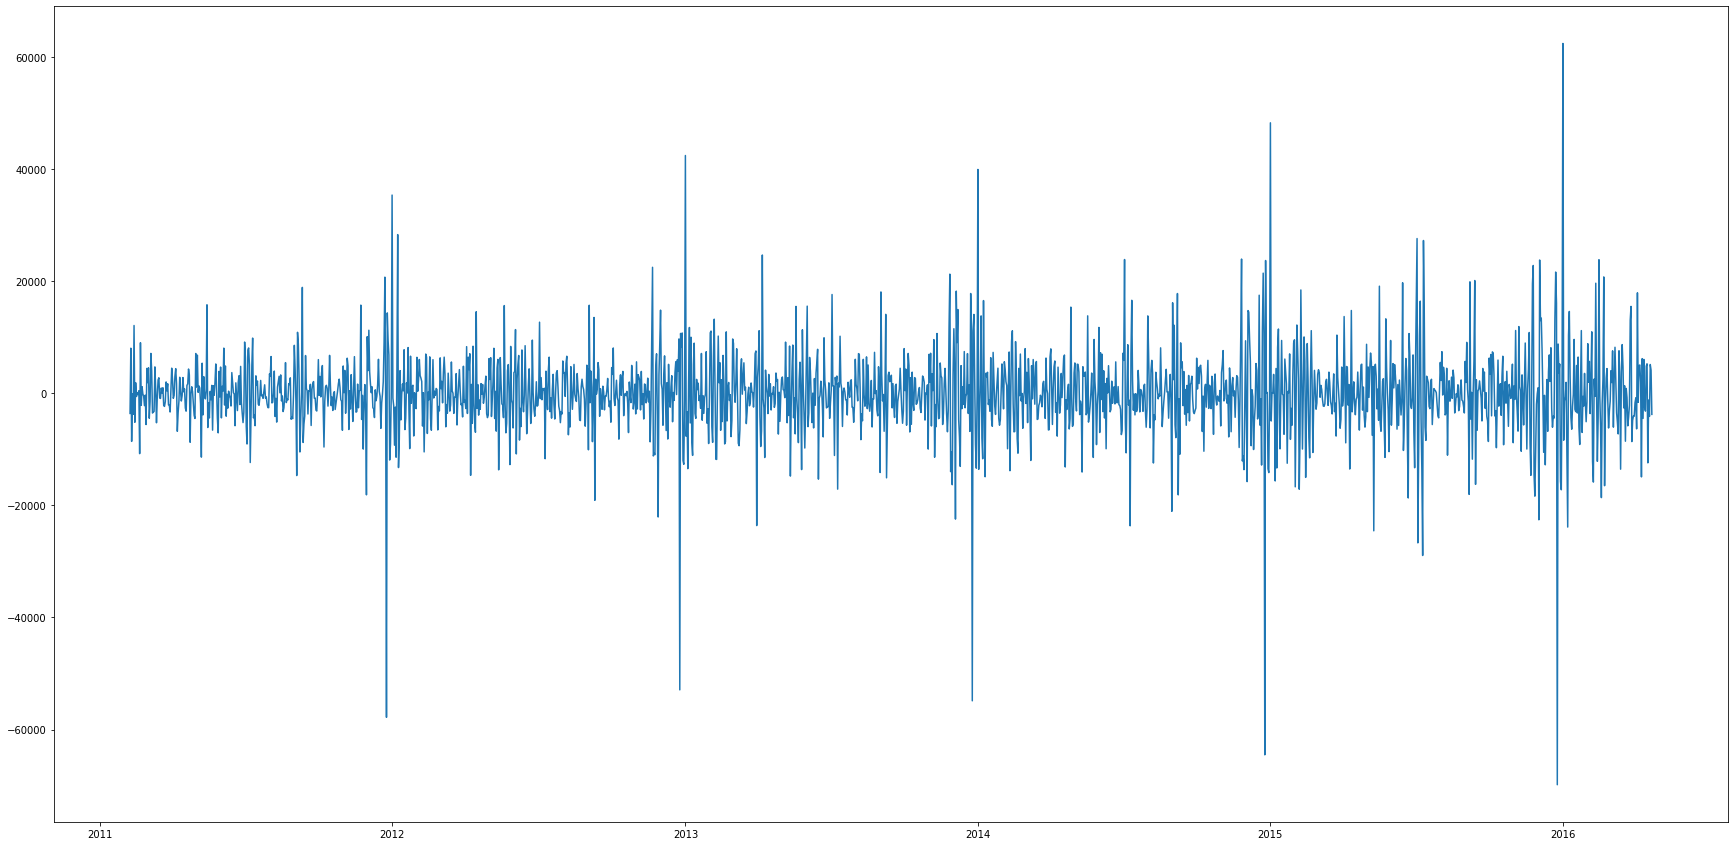

In [81]:
plt.plot(weekly_seasonal_decompose_result.resid)

In [82]:
result = adf_result(weekly_seasonal_decompose_result.resid.dropna(), alpha=0.025)

ADF test stats : -16.86265598596073
p-value : 1.096596232309328e-29
# lags used : 26
# observation used : 1873
Data is Stationary


#### Yearly Difference

In [83]:
datewise_total_sales["yearly_without_seasonality"] = datewise_total_sales["total_sales"].diff(365)

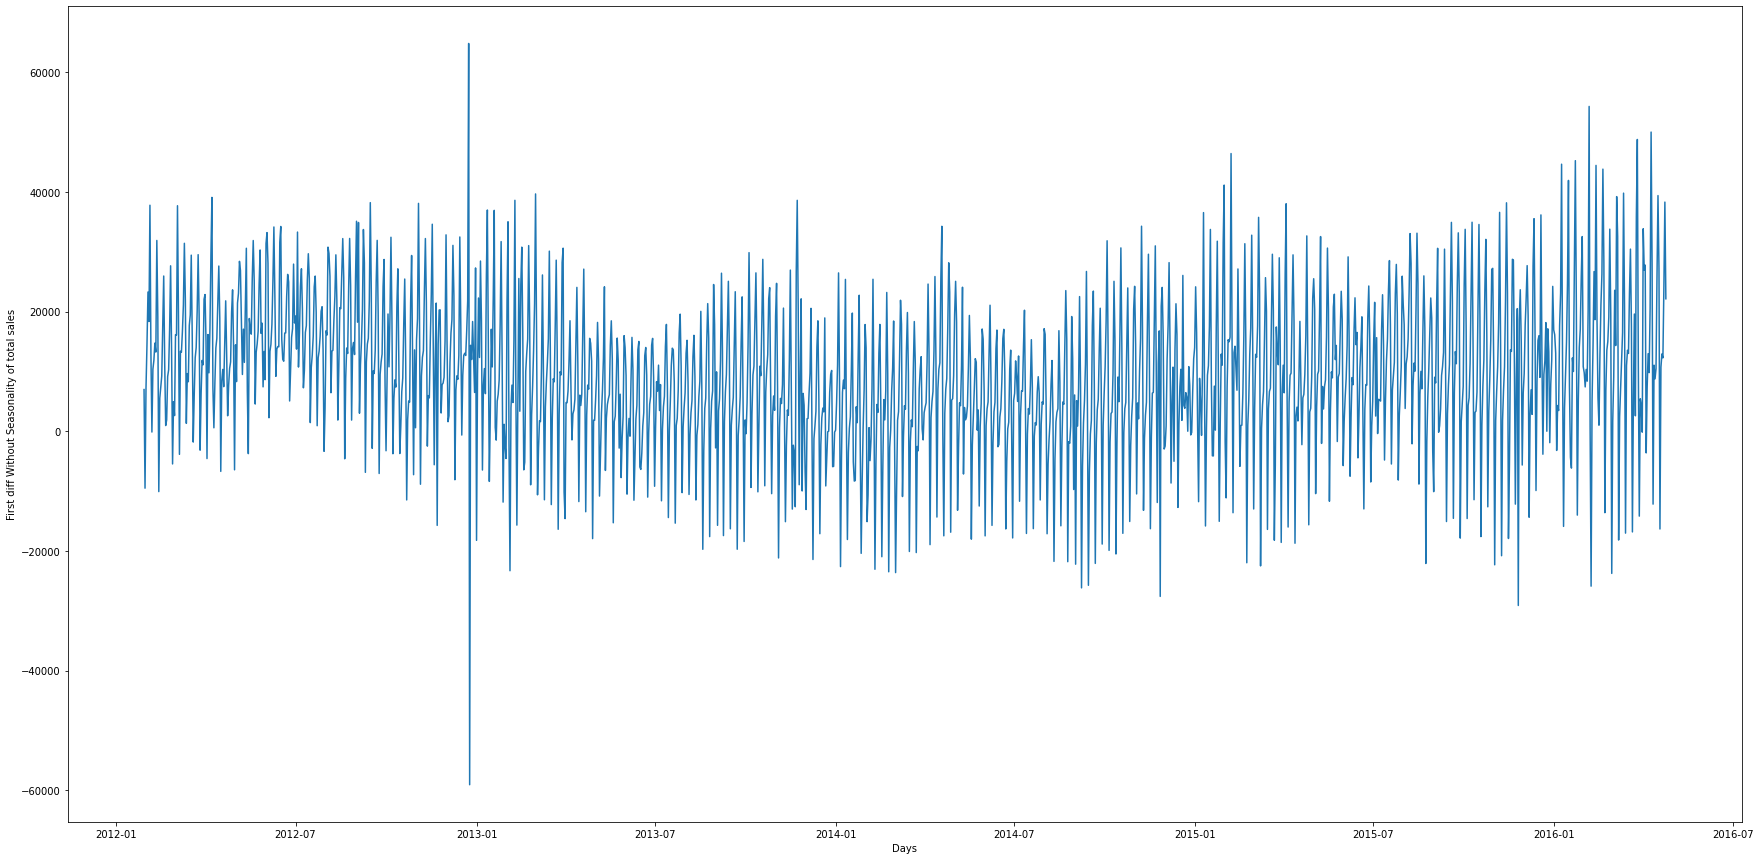

In [84]:
plt.plot(datewise_total_sales["yearly_without_seasonality"])
plt.xlabel("Days")
plt.ylabel("First diff Without Seasonality of total sales")
plt.show()

In [85]:
yearly_seasona_decompose_result = seasonal_decompose(datewise_total_sales["yearly_without_seasonality"].dropna(), model='add')

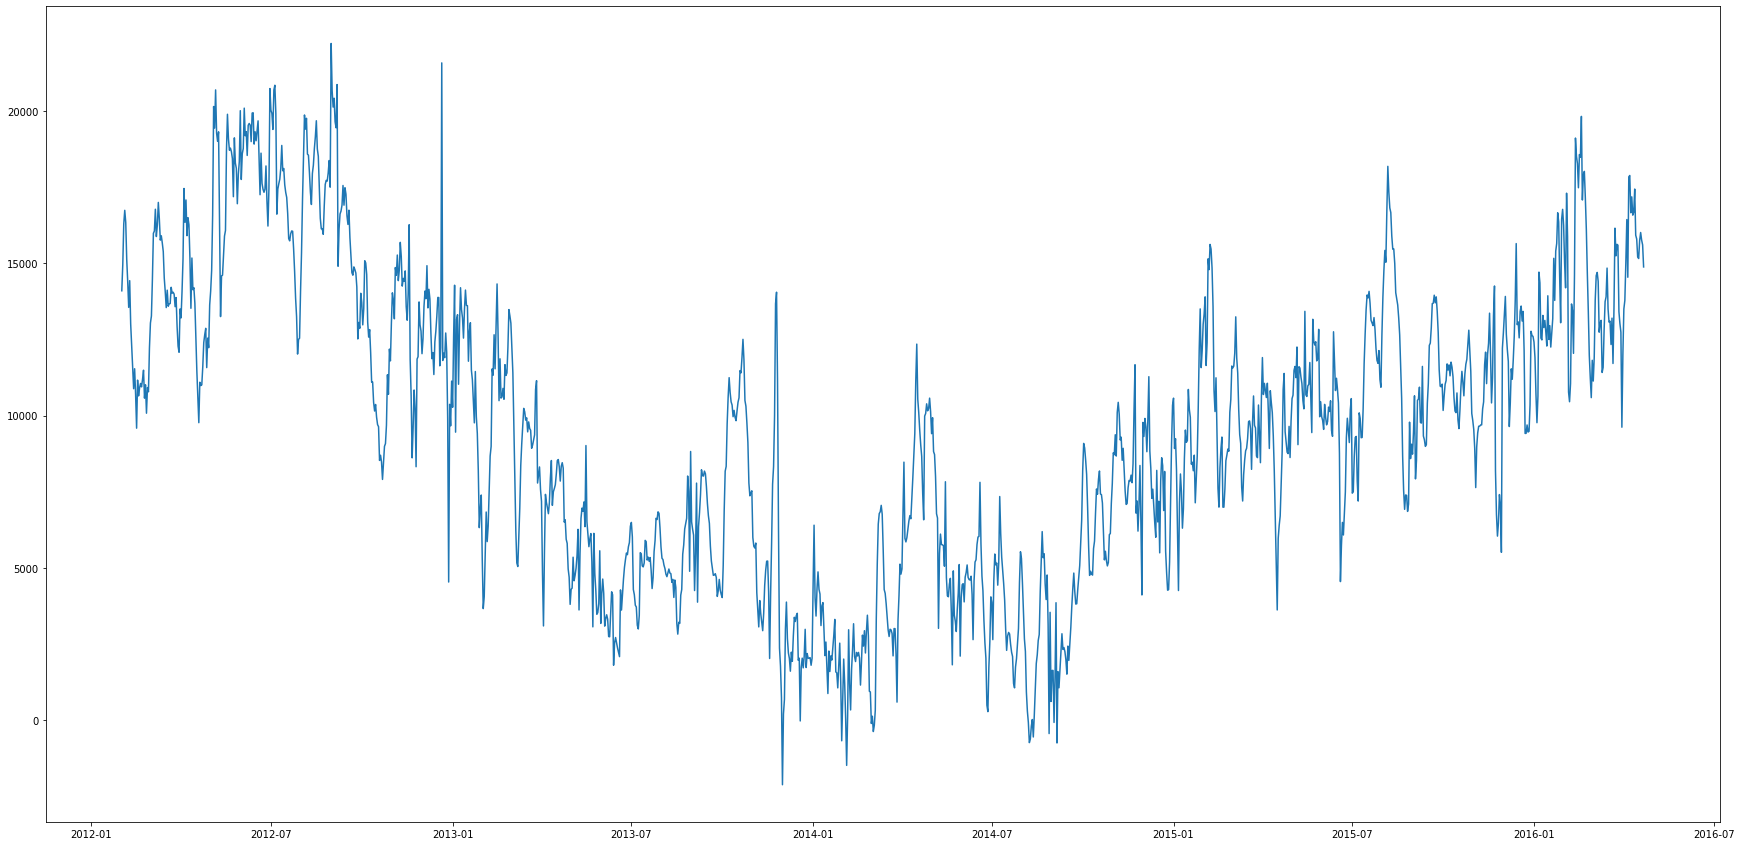

In [86]:
plt.plot(yearly_seasona_decompose_result.trend)

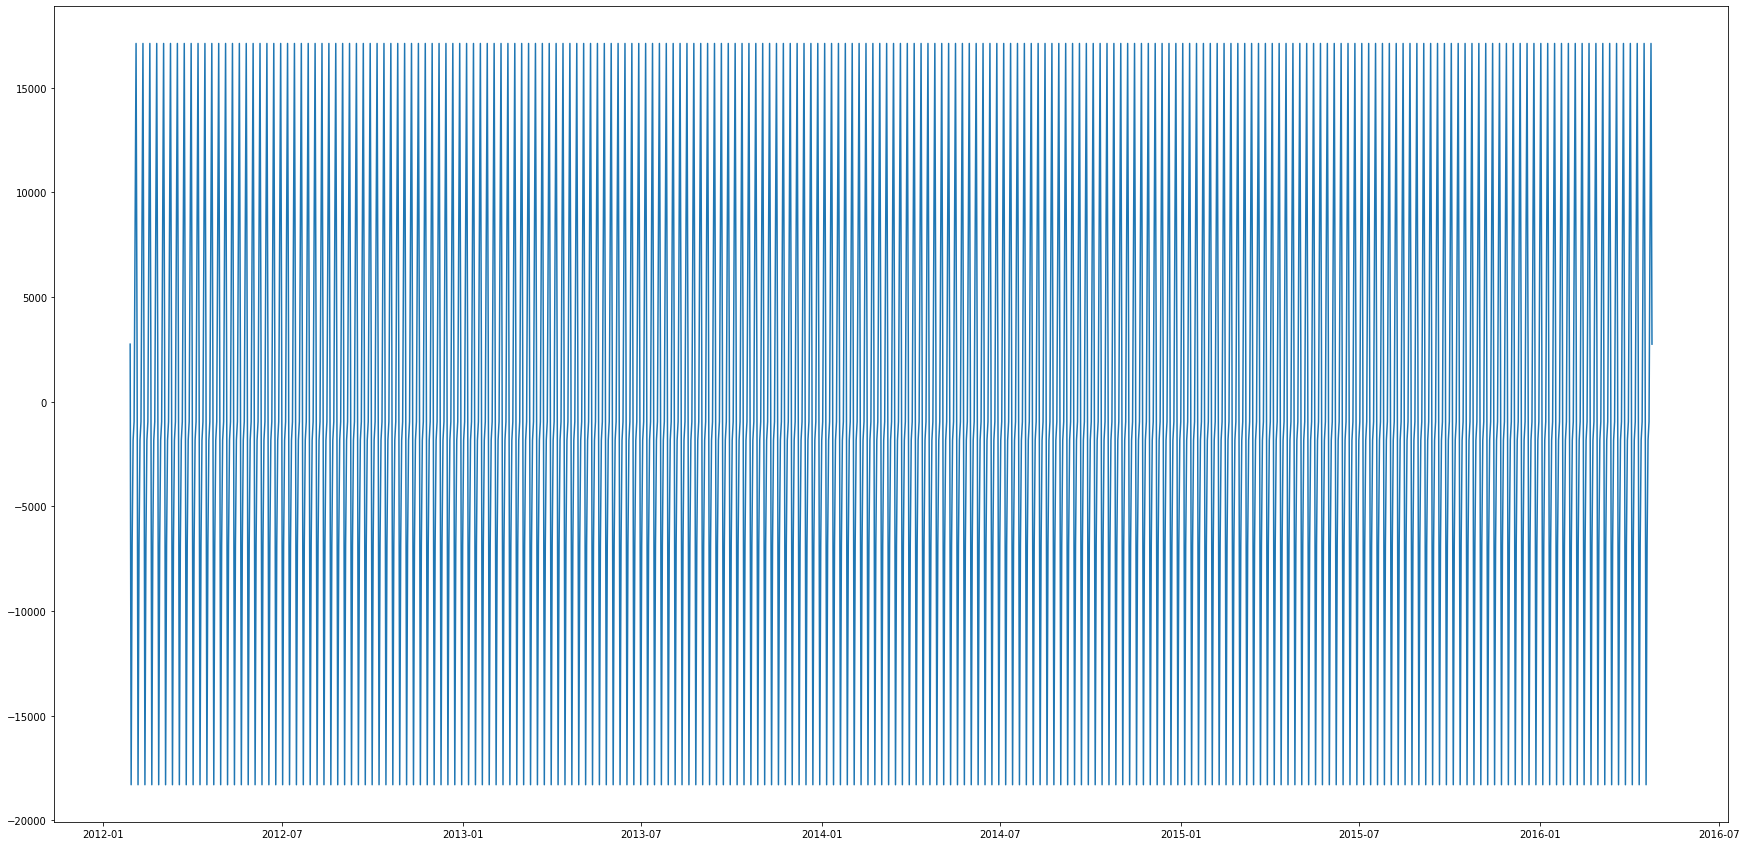

In [87]:
plt.plot(yearly_seasona_decompose_result.seasonal)

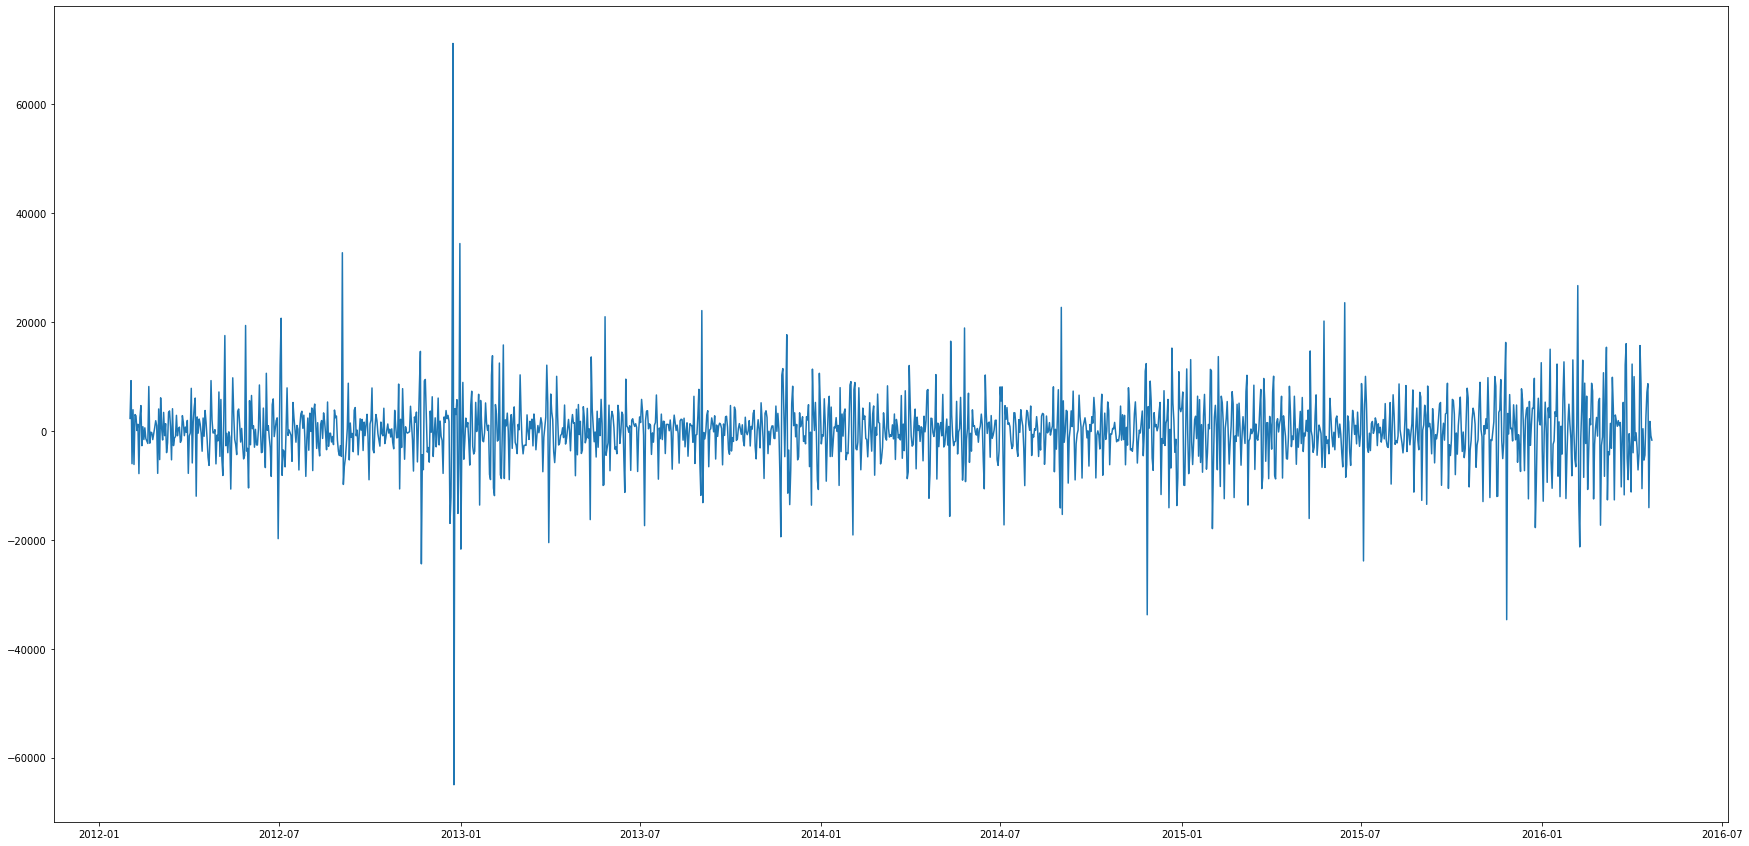

In [88]:
plt.plot(yearly_seasona_decompose_result.resid)

#### Plot PACF  for AR 

In [89]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

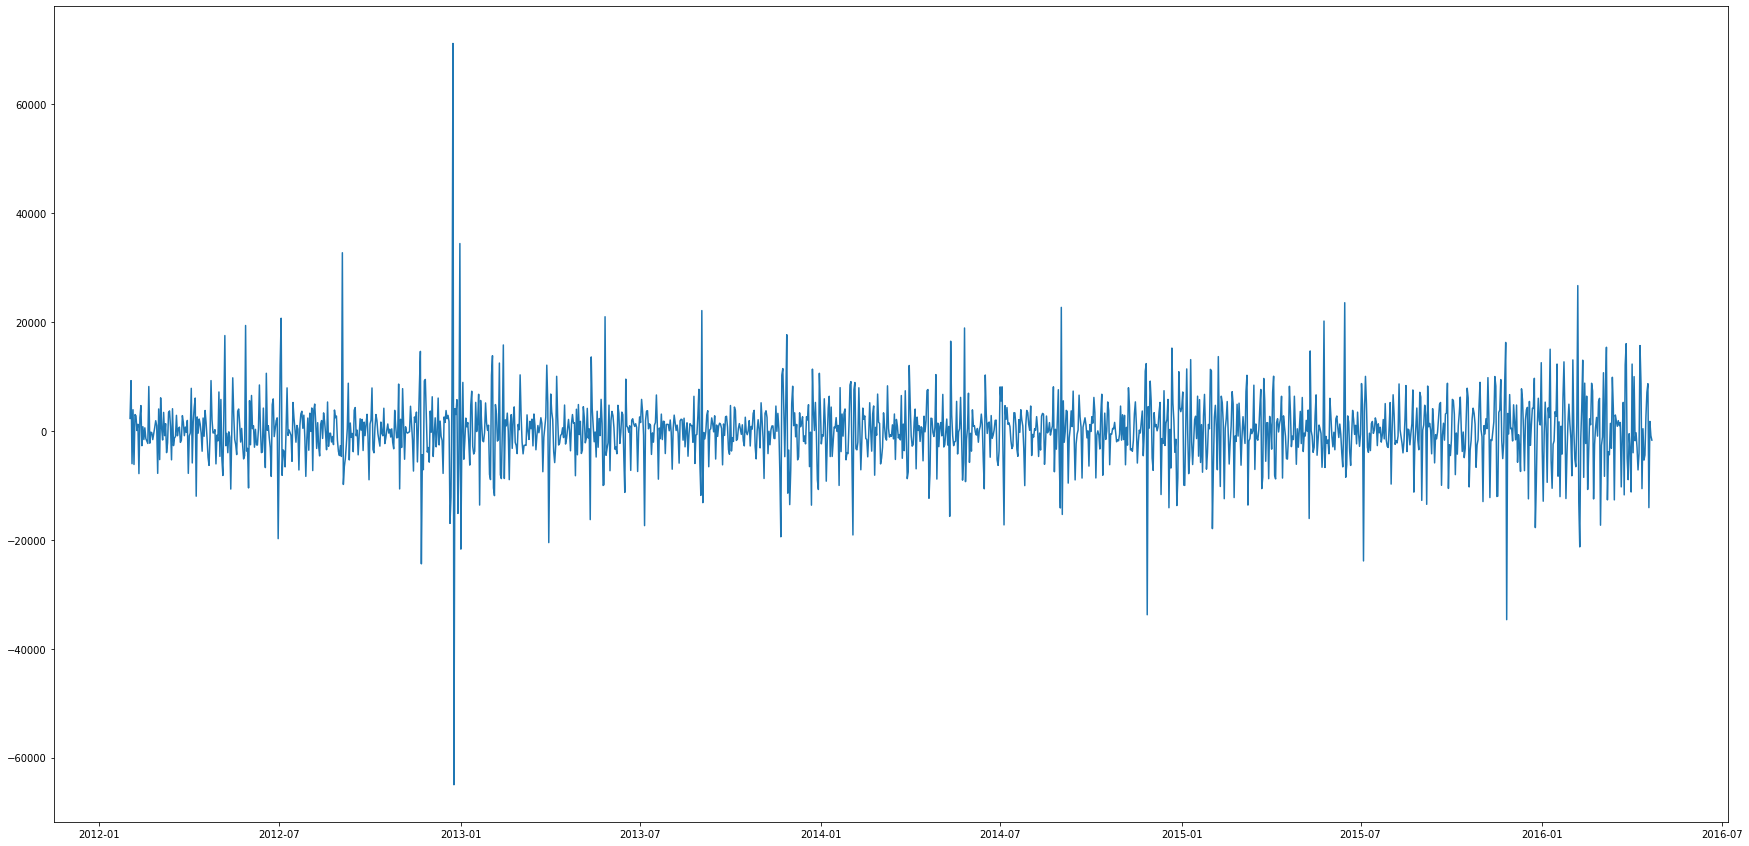

In [90]:
plt.plot(yearly_seasona_decompose_result.resid.dropna())

### PACF Plot

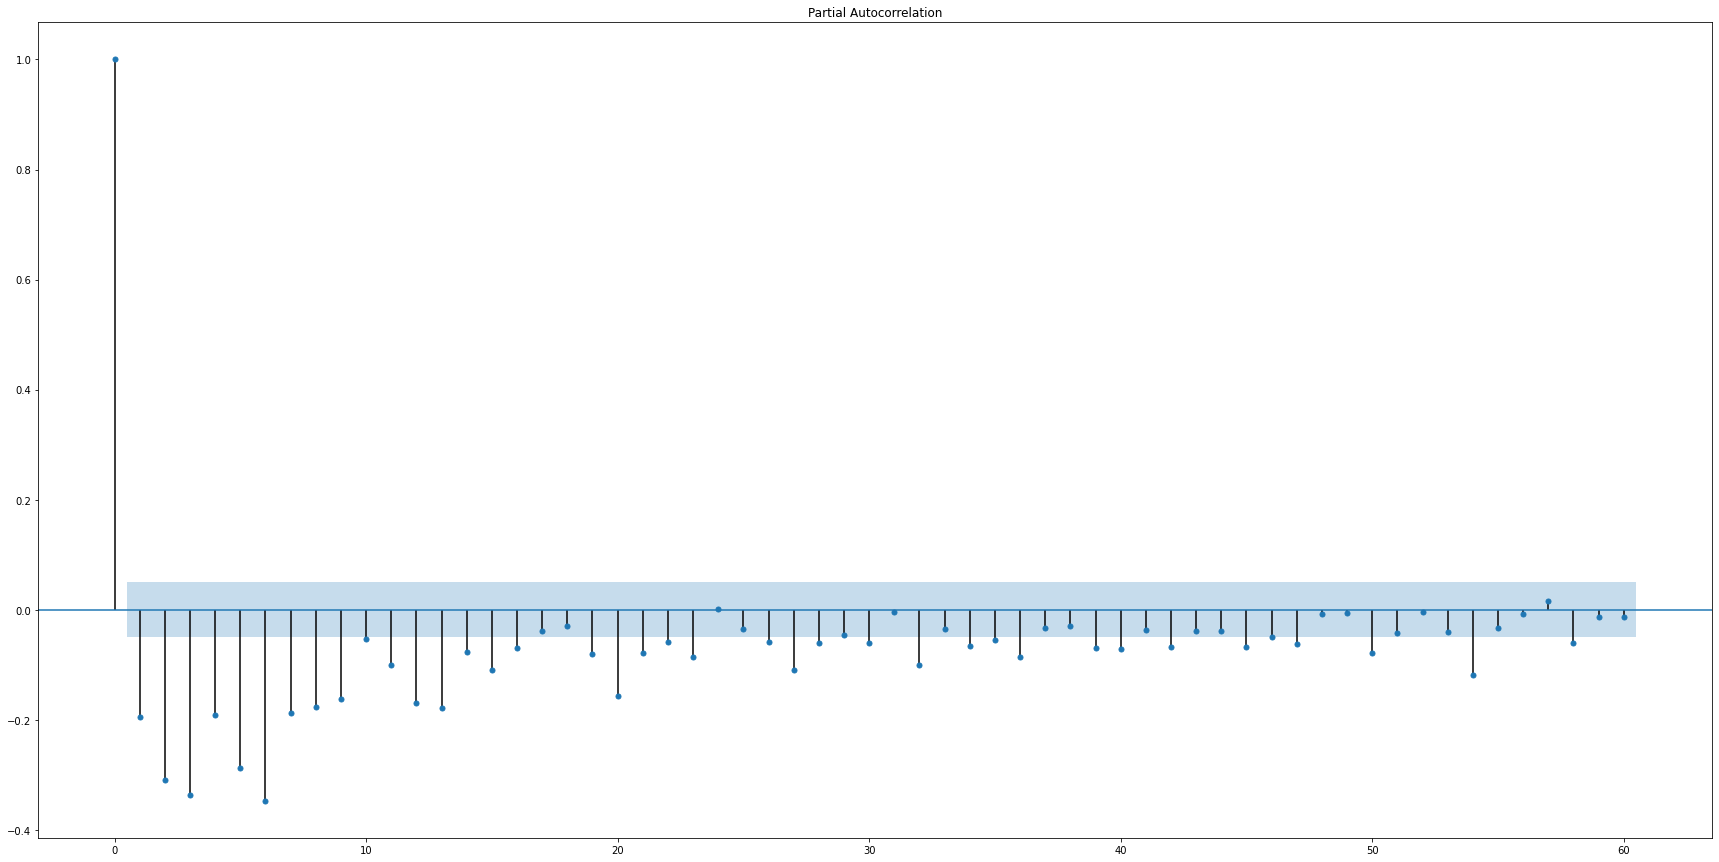

In [91]:
fig, ax = plt.subplots(figsize=(30, 15))
plot_pacf(yearly_seasona_decompose_result.resid.dropna(), lags=60, ax=ax)
plt.show()

### ACF Plot

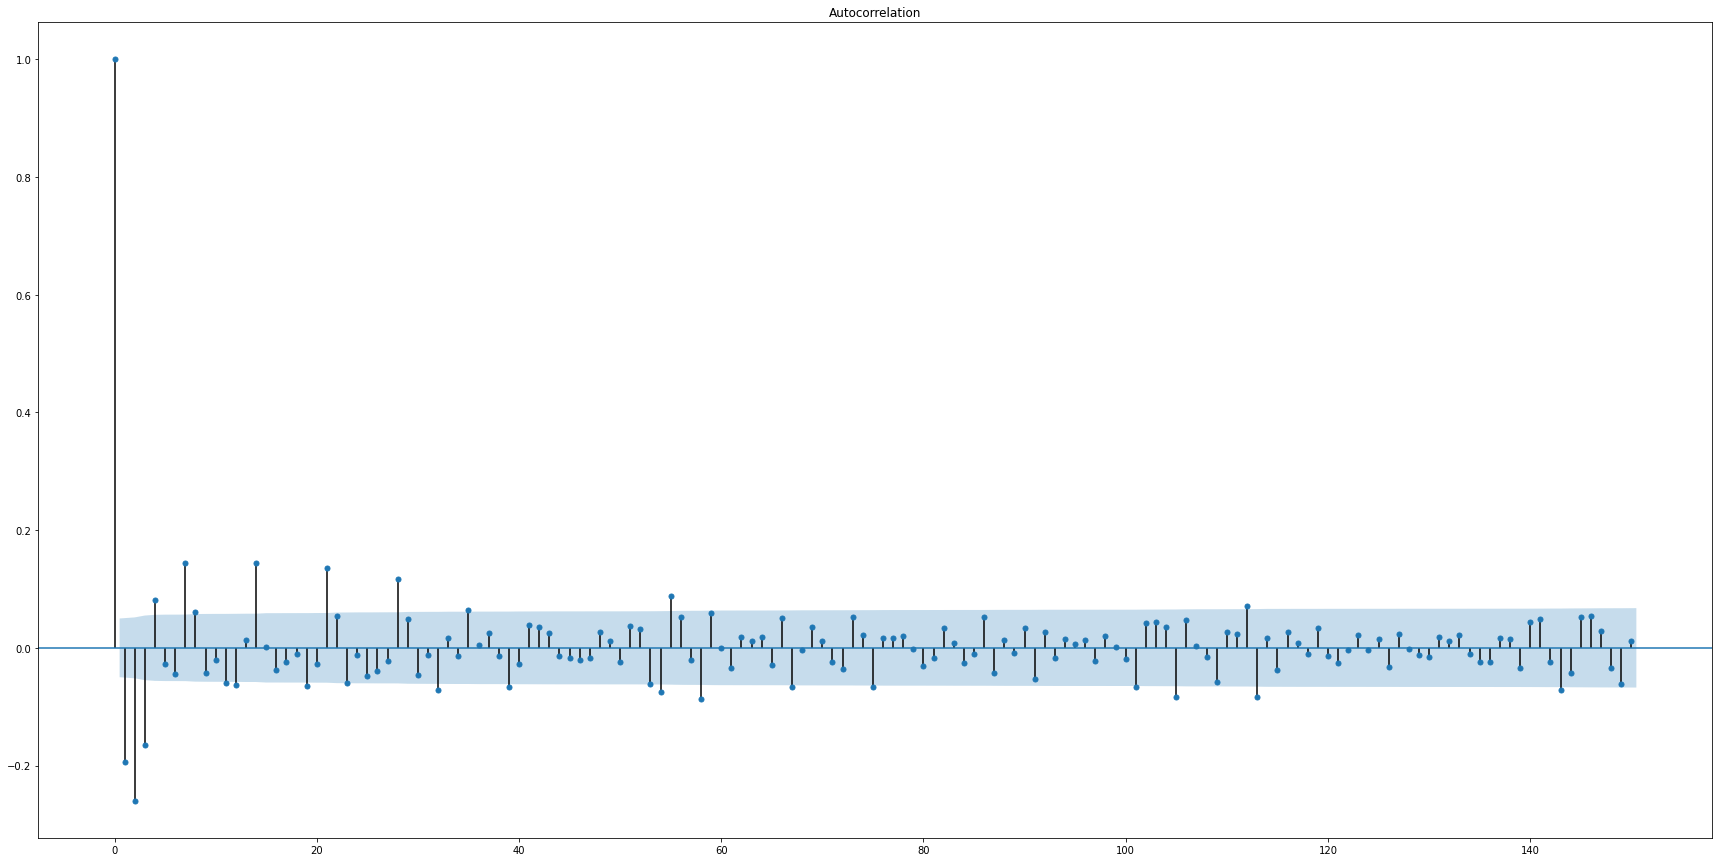

In [92]:
fig, ax = plt.subplots(figsize=(30, 15))
plot_acf(yearly_seasona_decompose_result.resid.dropna(), lags=150,ax=ax)
plt.show()


In [93]:
datewise_total_sales["weekly_diff_without_seasonality"][7:]

date
2011-02-05     9538.0
2011-02-06     4053.0
2011-02-07     5895.0
2011-02-08      275.0
2011-02-09    10388.0
               ...   
2016-04-20      271.0
2016-04-21    -6870.0
2016-04-22    -2907.0
2016-04-23     2436.0
2016-04-24    -1390.0
Name: weekly_diff_without_seasonality, Length: 1906, dtype: float64

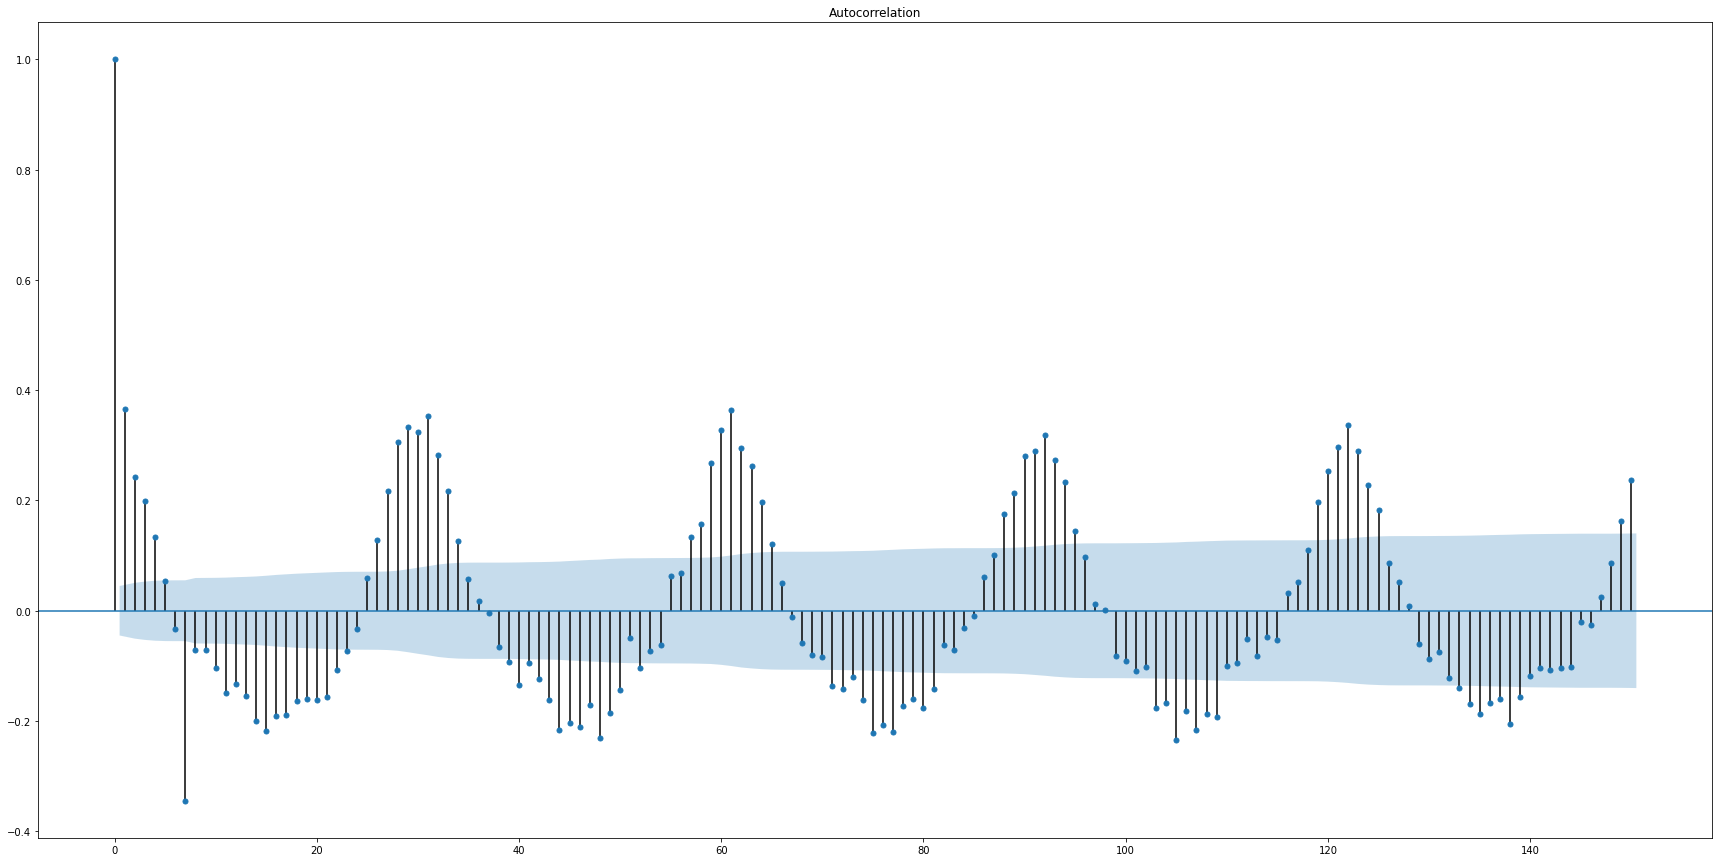

In [94]:
fig, ax = plt.subplots(figsize=(30,15))
plot_acf(datewise_total_sales["weekly_diff_without_seasonality"][8:], lags=150, ax=ax)
plt.show()

In [95]:
import statsmodels.api as sm
sarimax = sm.tsa.statespace.SARIMAX(np.array(train_datewise_total_sales["total_sales"]), order=(4,1,3),  seasonal_order=(1,1,1,7)).fit()
train_datewise_total_sales["SARIMA"] = sarimax.fittedvalues
test_datewise_total_sales["SARIMA"] =  sarimax.forecast(len(test_datewise_total_sales))
 

[]

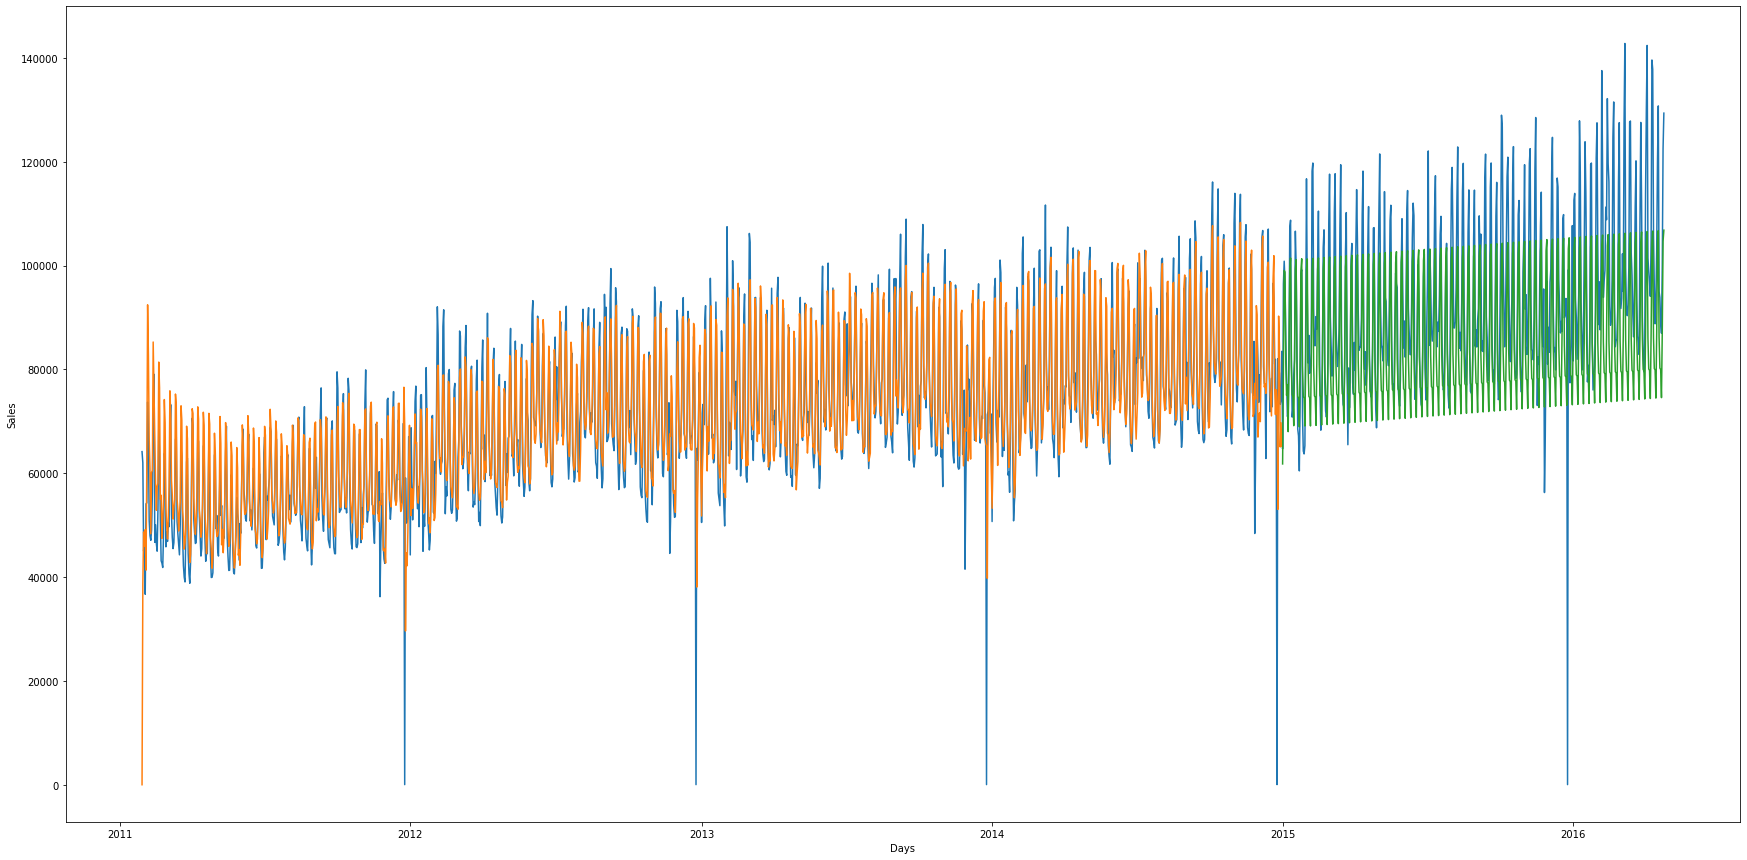

In [96]:
plt.figure(figsize=(30, 15))
plt.plot(datewise_total_sales["total_sales"], label="Original Pattern")
plt.plot(train_datewise_total_sales["SARIMA"], label="Train Pattern")
plt.plot(test_datewise_total_sales["SARIMA"], label="Predicted Patten")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.plot()

In [97]:
training_error = np.sqrt(mean_squared_error(train_datewise_total_sales["SARIMA"], train_datewise_total_sales["total_sales"]))
test_error = np.sqrt(mean_squared_error(test_datewise_total_sales["SARIMA"], test_datewise_total_sales["total_sales"]))
print(f"Traing RMSE(Root Mean Sqaure Error) : {training_error}")
print(f"Traing RMSE(Root Mean Sqaure Error) : {test_error}")

Traing RMSE(Root Mean Sqaure Error) : 7005.538764211919
Traing RMSE(Root Mean Sqaure Error) : 12642.525240323012


In [98]:
14218.410364154644

14218.410364154644